# Detecting Human Activities Through Smartwatch Sensor - EDA 

- Data set source:  WISDM Lab of Frodham University, NY
https://archive.ics.uci.edu/dataset/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset

Data captured using

- Two kinds of devices:
    - Smartphone (Samsung Galaxy S5)
    - Smartwatch (LG G)

    
- Two kinds of embedded kinematic sensors (for each device):
    - Accelerometer - for measurement of linear acceleration (m/sec^2)
    - Gyroscope - for measurement of angular velocity (rad/sec)



Reference coordinate system definition:
---

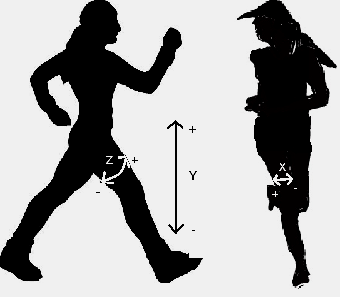


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from tqdm import tqdm
import filecmp

PBAR_FORMAT='{desc:12}{percentage:3.0f}%|{bar:27}[ {n:4d}/{total:4d}, {elapsed}<{remaining}{postfix} ]'

Each activity is represented as an alphabet in the dataset. To make meaningful inference of data we map it to actual activity

In [3]:
activity_codes_mapping = {'A': 'walking',
                          'B': 'jogging',
                          'C': 'stairs',
                          'D': 'sitting',
                          'E': 'standing',
                          'F': 'typing',
                          'G': 'brushing teeth',
                          'H': 'eating soup',
                          'I': 'eating chips',
                          'J': 'eating pasta',
                          'K': 'drinking from cup',
                          'L': 'eating sandwich',
                          'M': 'kicking soccer ball',
                          'O': 'playing catch tennis ball',
                          'P': 'dribbling basket ball',
                          'Q': 'writing',
                          'R': 'clapping',
                          'S': 'folding clothes'}

# Dataset understanding

## Watch Accelerometer

- Load the phone accelerometer sensor data for participant 1

In [4]:
df_wa_p01 = pd.read_csv(r'../dataset/raw/watch/accel/data_1601_accel_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
df_wa_p01.z = df_wa_p01.z.str.strip(';')
df_wa_p01.z = pd.to_numeric(df_wa_p01.z)
df_wa_p01['activity'] = df_wa_p01['activity_code'].map(activity_codes_mapping)
df_wa_p01 = df_wa_p01[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

df_wa_p01

participant_id activity_code         activity         timestamp  \
0                1601             A          walking  1896411611733301   
1                1601             A          walking  1896411661695801   
2                1601             A          walking  1896411711658874   
3                1601             A          walking  1896411761623926   
4                1601             A          walking  1896411811593717   
...               ...           ...              ...               ...   
64835            1601             S  folding clothes  1890263664188560   
64836            1601             S  folding clothes  1890263714160022   
64837            1601             S  folding clothes  1890263764099780   
64838            1601             S  folding clothes  1890263814039267   
64839            1601             S  folding clothes  1890263863976350   

               x         y          z  
0      -2.969708 -1.949329  10.726623  
1      -3.486855 -2.420987  11.660361  
2      -2.826056 -2.854338   9.792884  
3      -3.307290 -3.076998   9.926959  
4      -3.996820 -2.847155   9.280524  
...          ...       ...        ...  
64835   7.785346 -2.825756  11.020660  
64836   5.726332 -1.128267  12.821099  
64837   6.719925 -2.854487  12.031014  
64838   8.802881 -2.334945   9.308805  
64839  14.122797 -0.079607   4.846014  

[64840 rows x 7 columns]

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

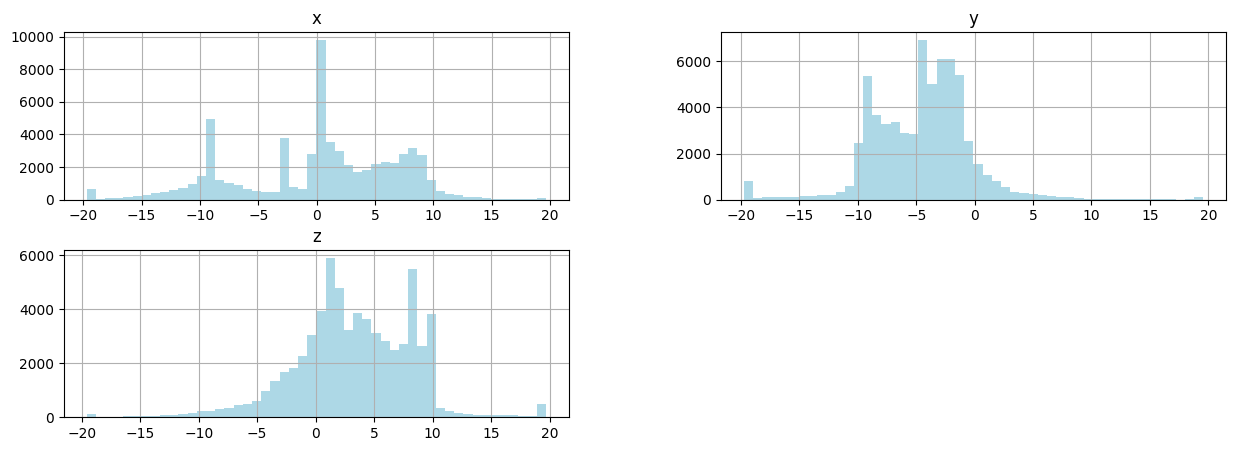

In [8]:
df_wa_p01[['x', 'y', 'z']].hist(bins = 50, figsize = (15, 5), color='lightblue')

    - Observation
        - Mode separation : hand downwards, hand upwards, hand horizontal

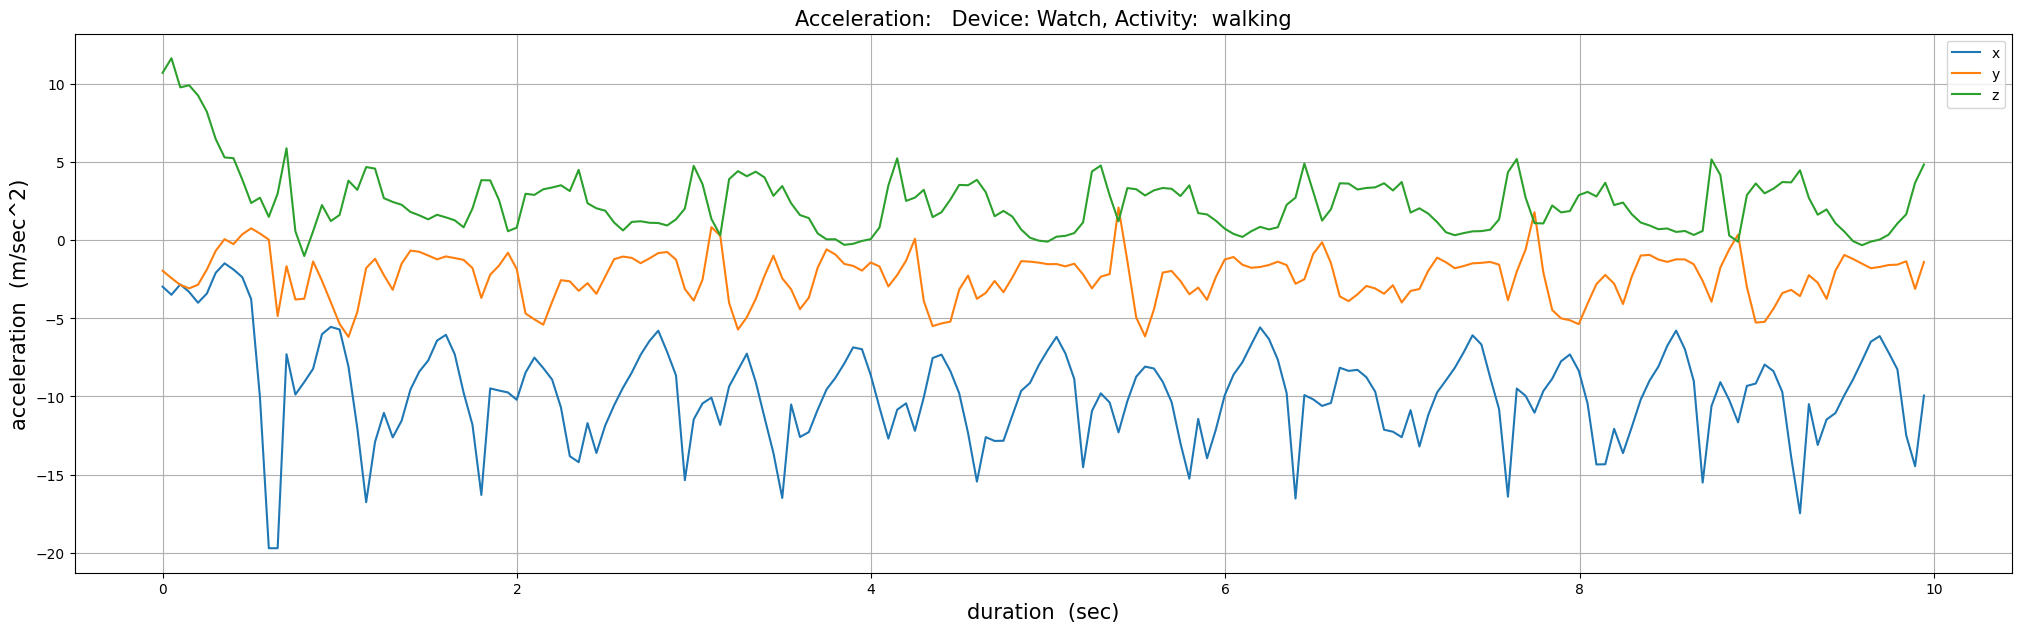

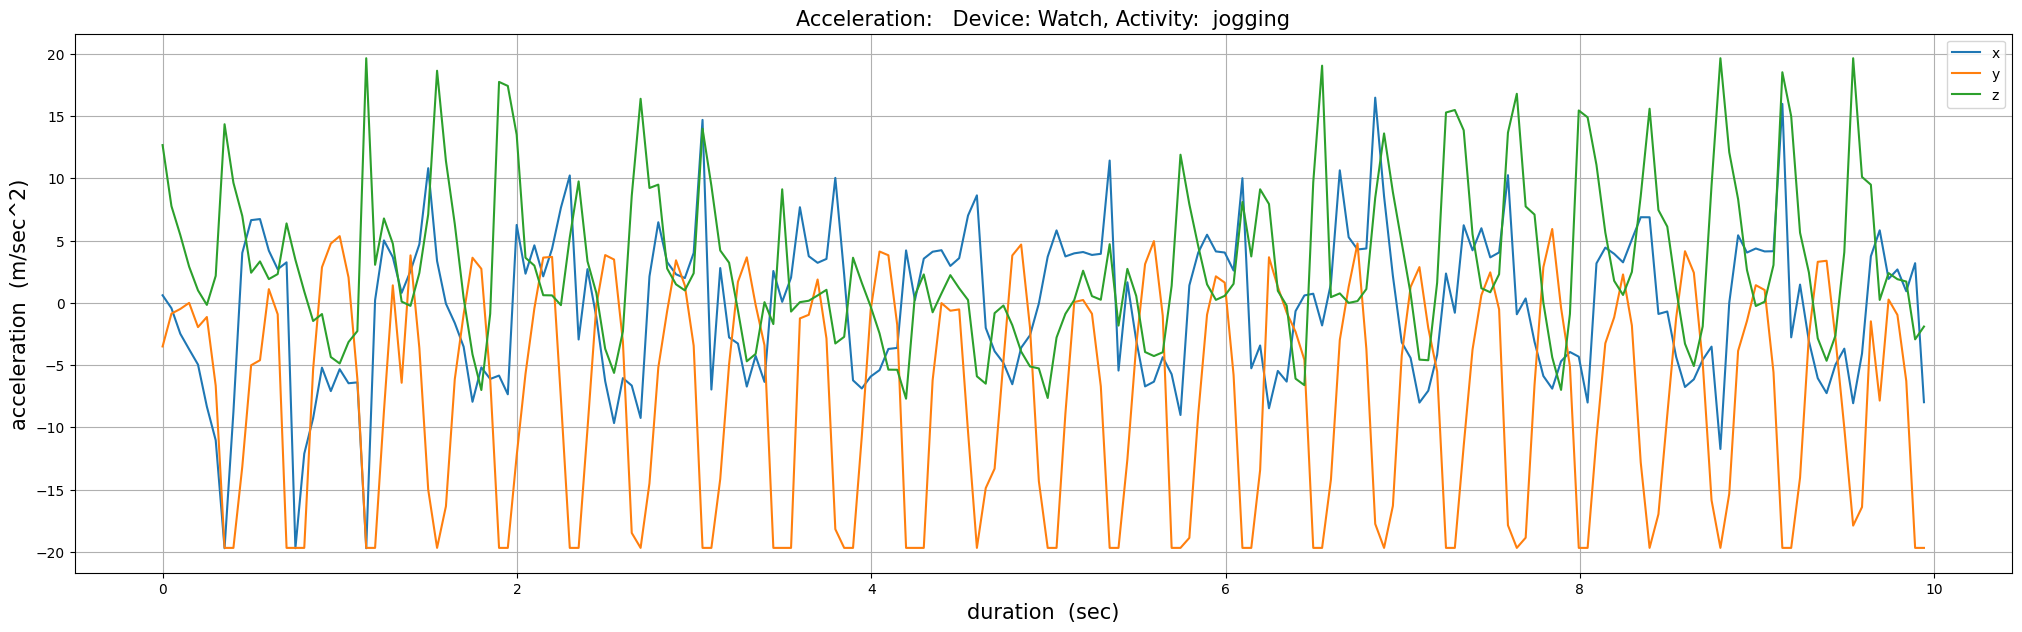

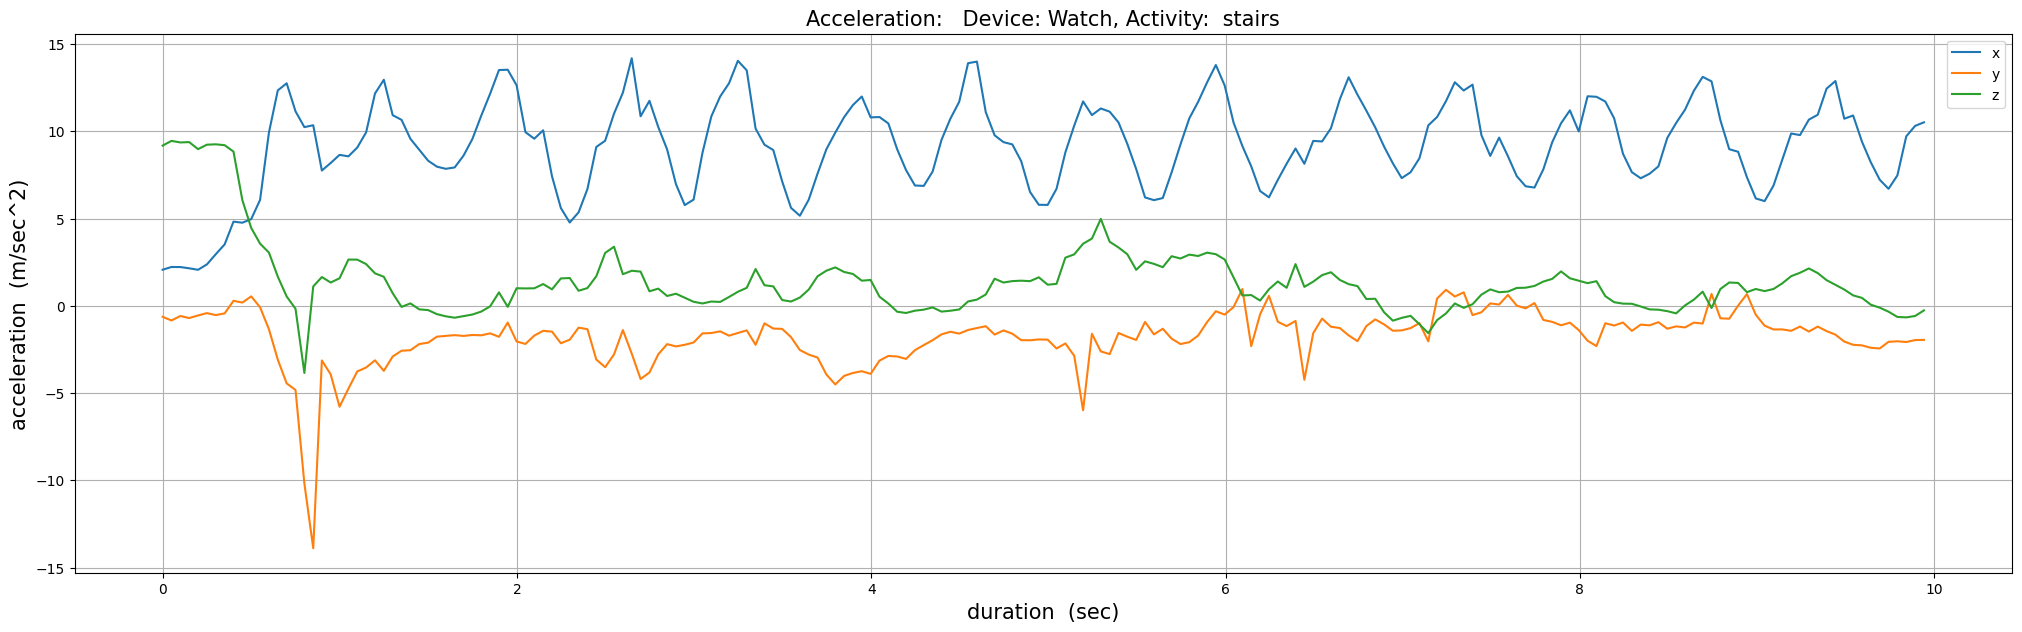

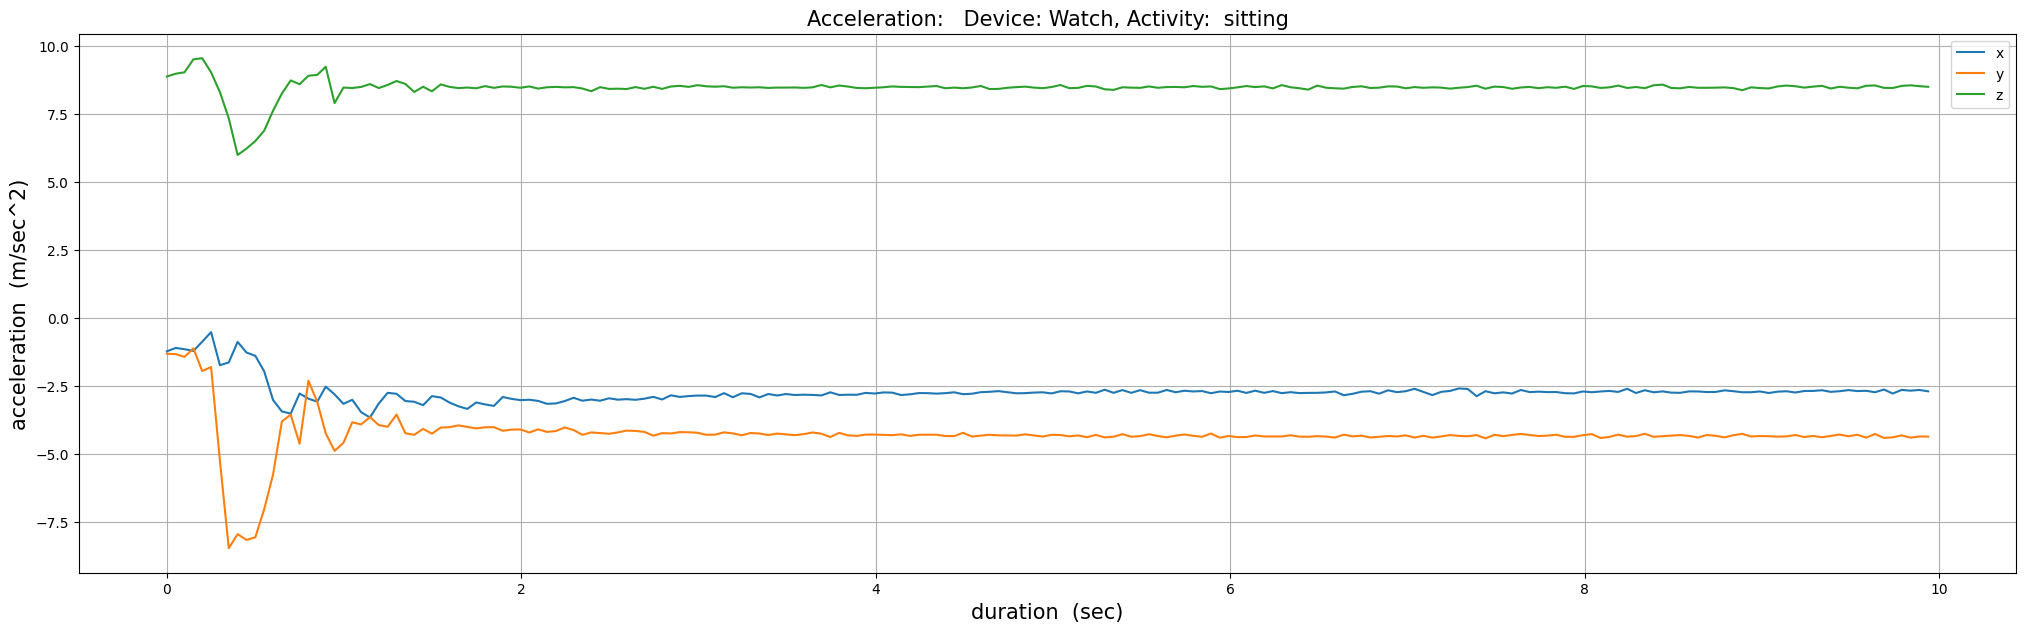

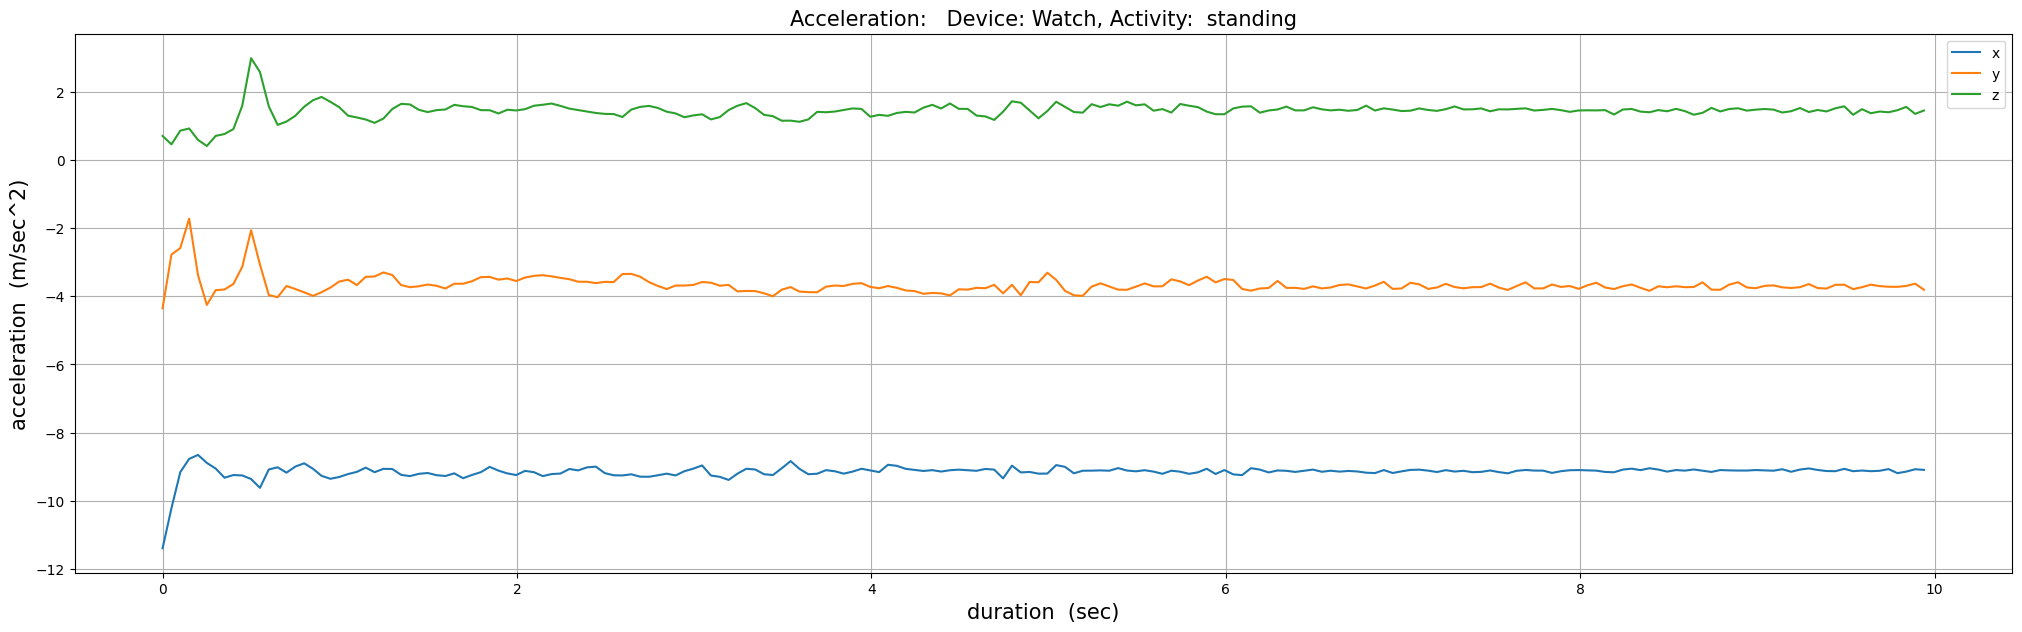

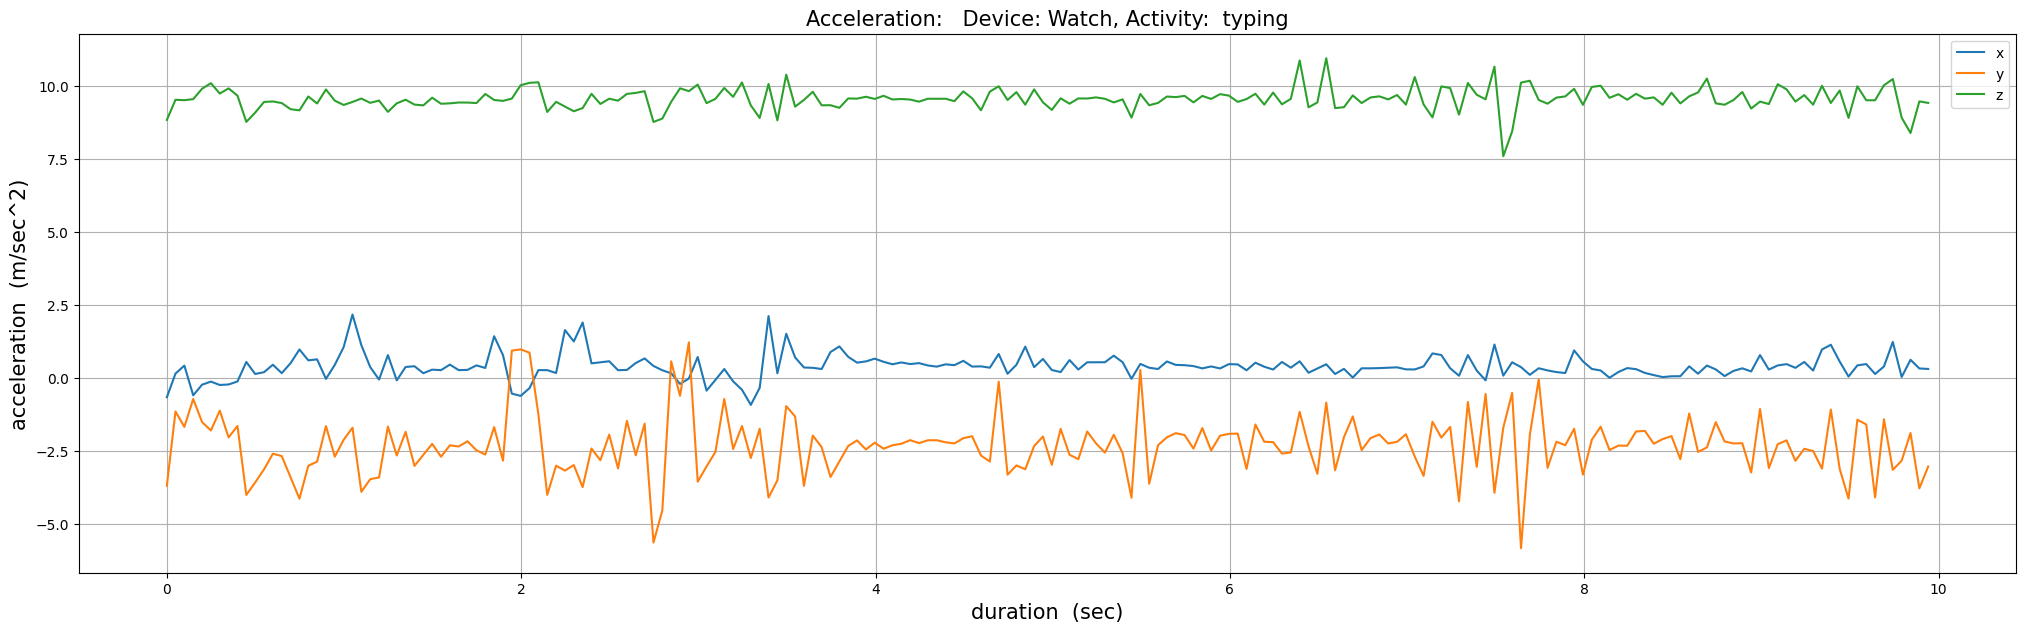

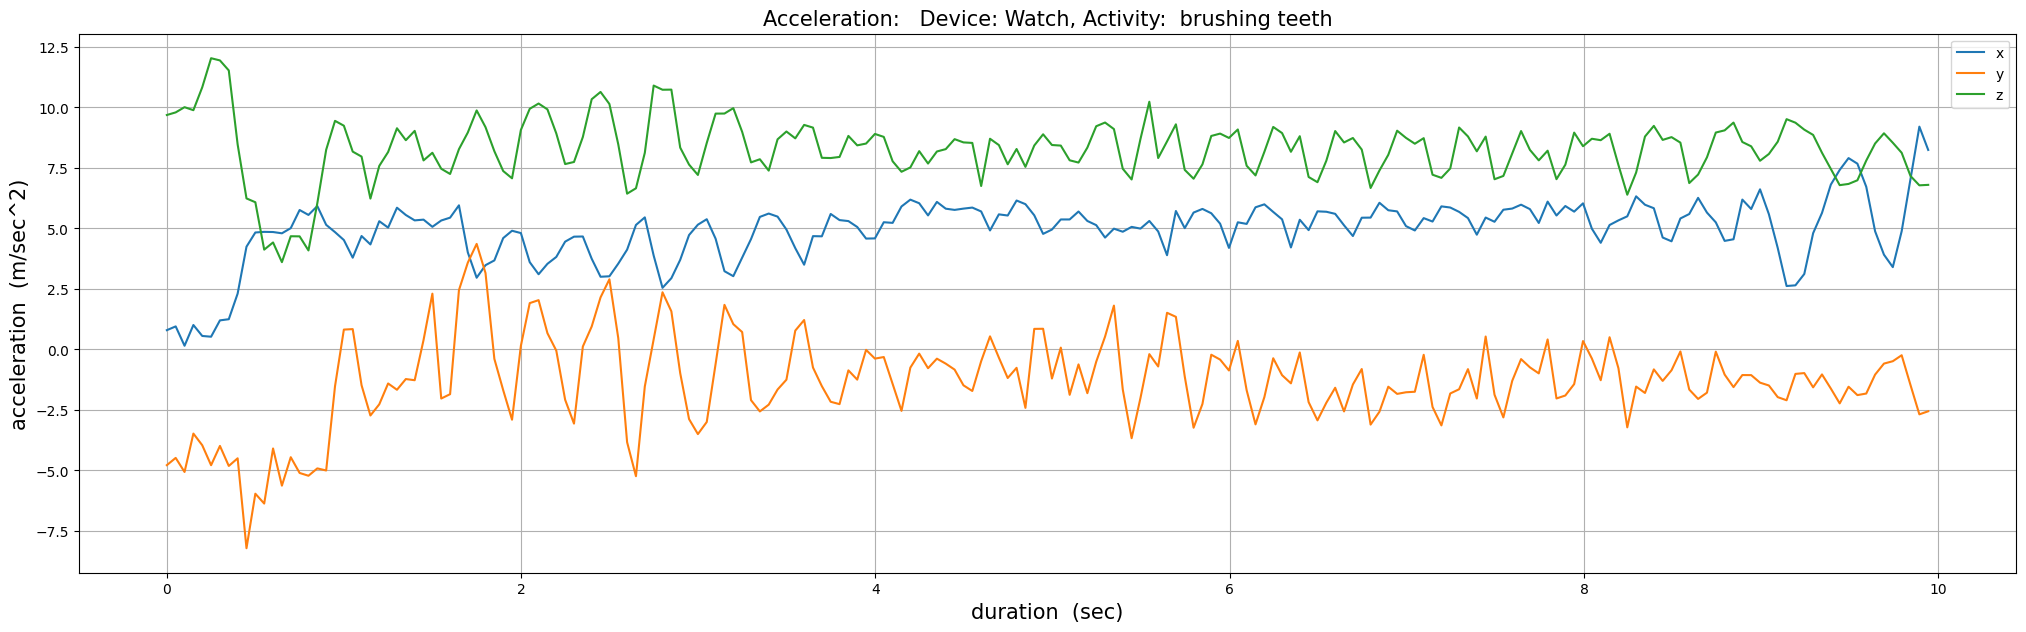

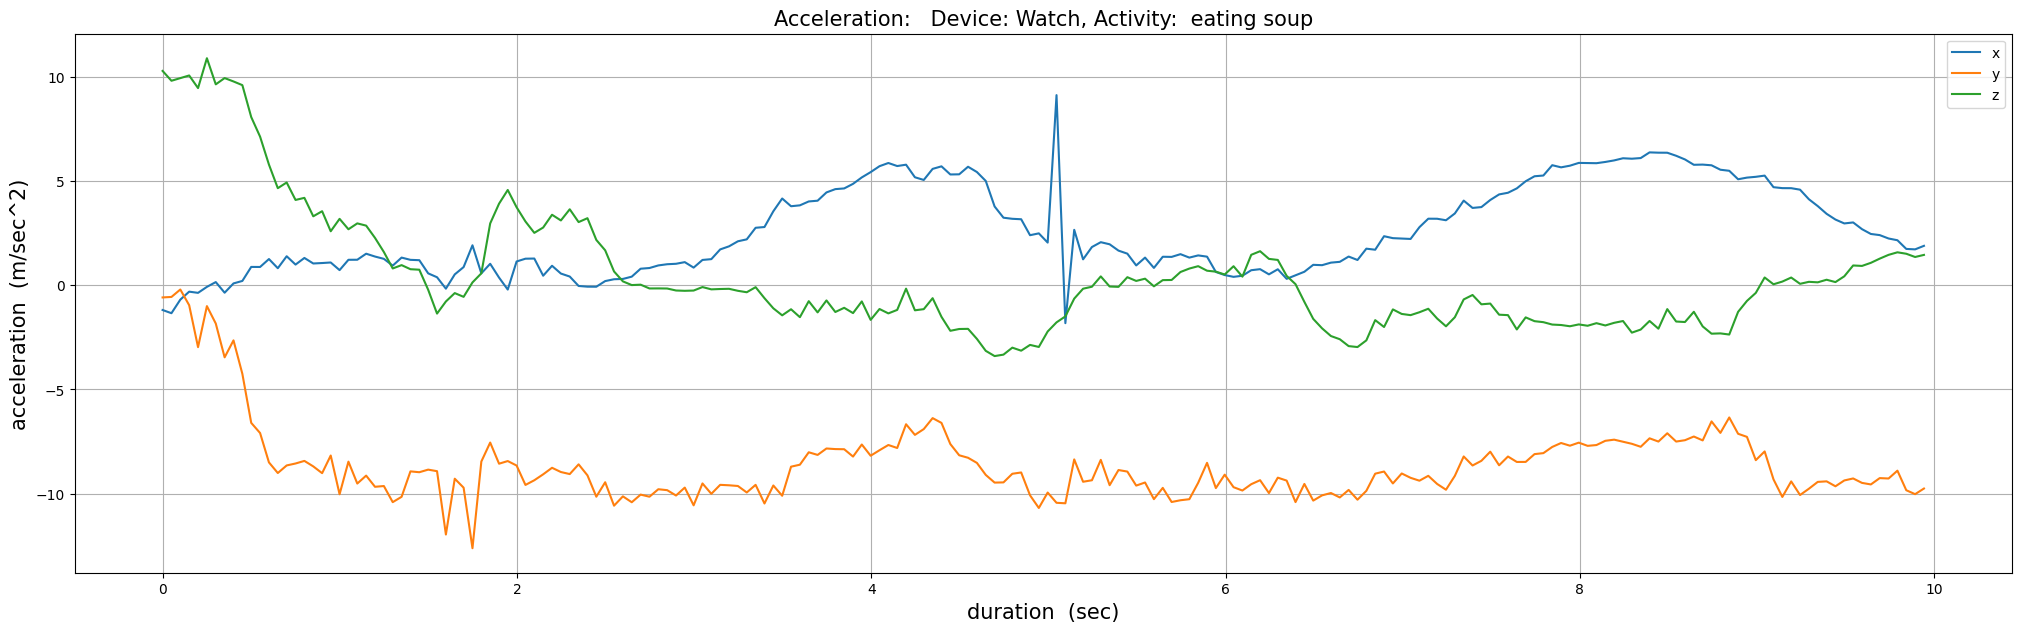

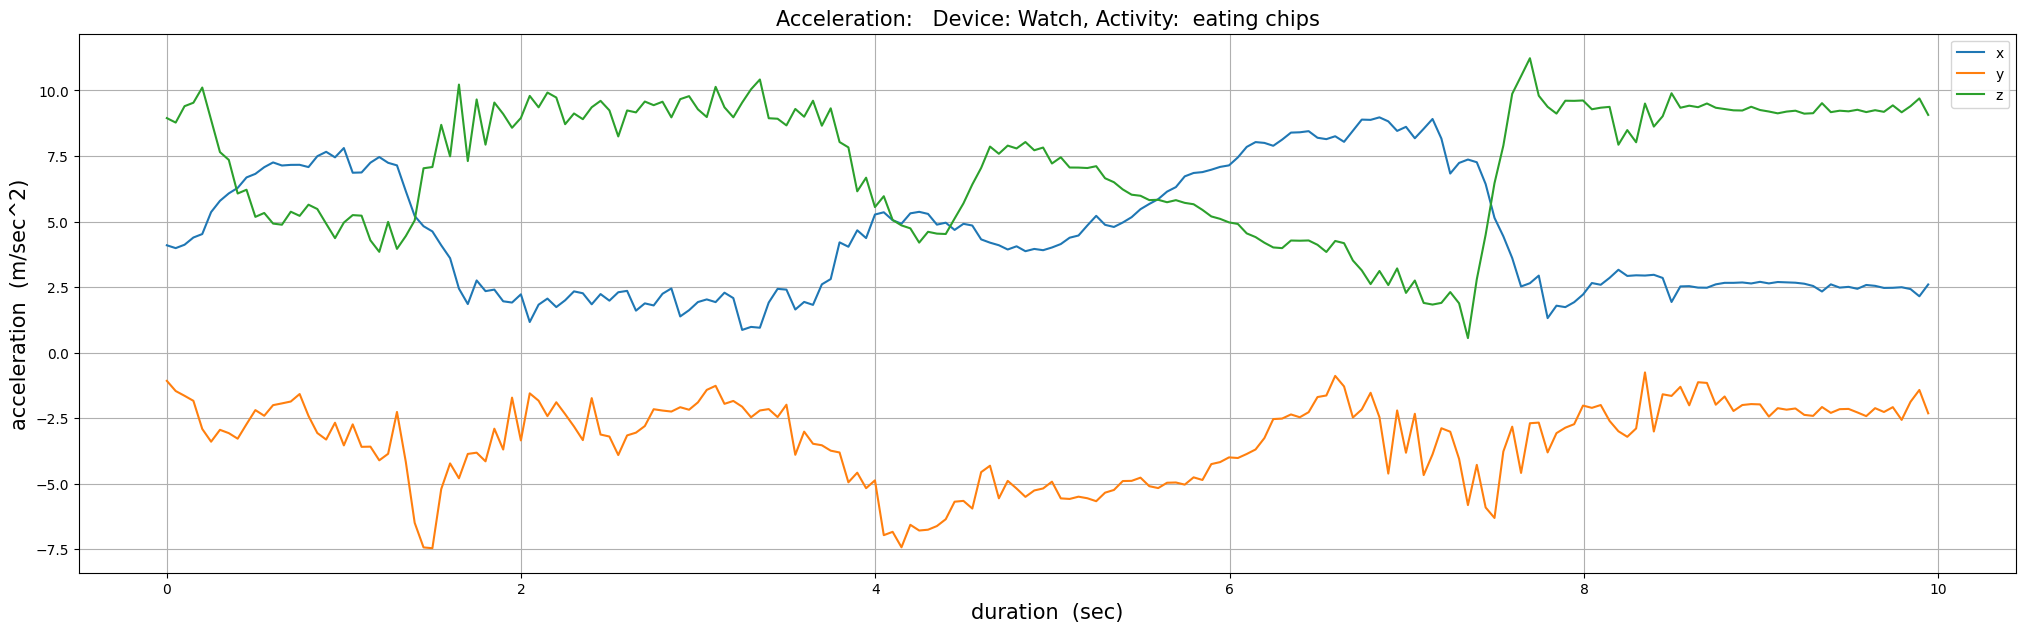

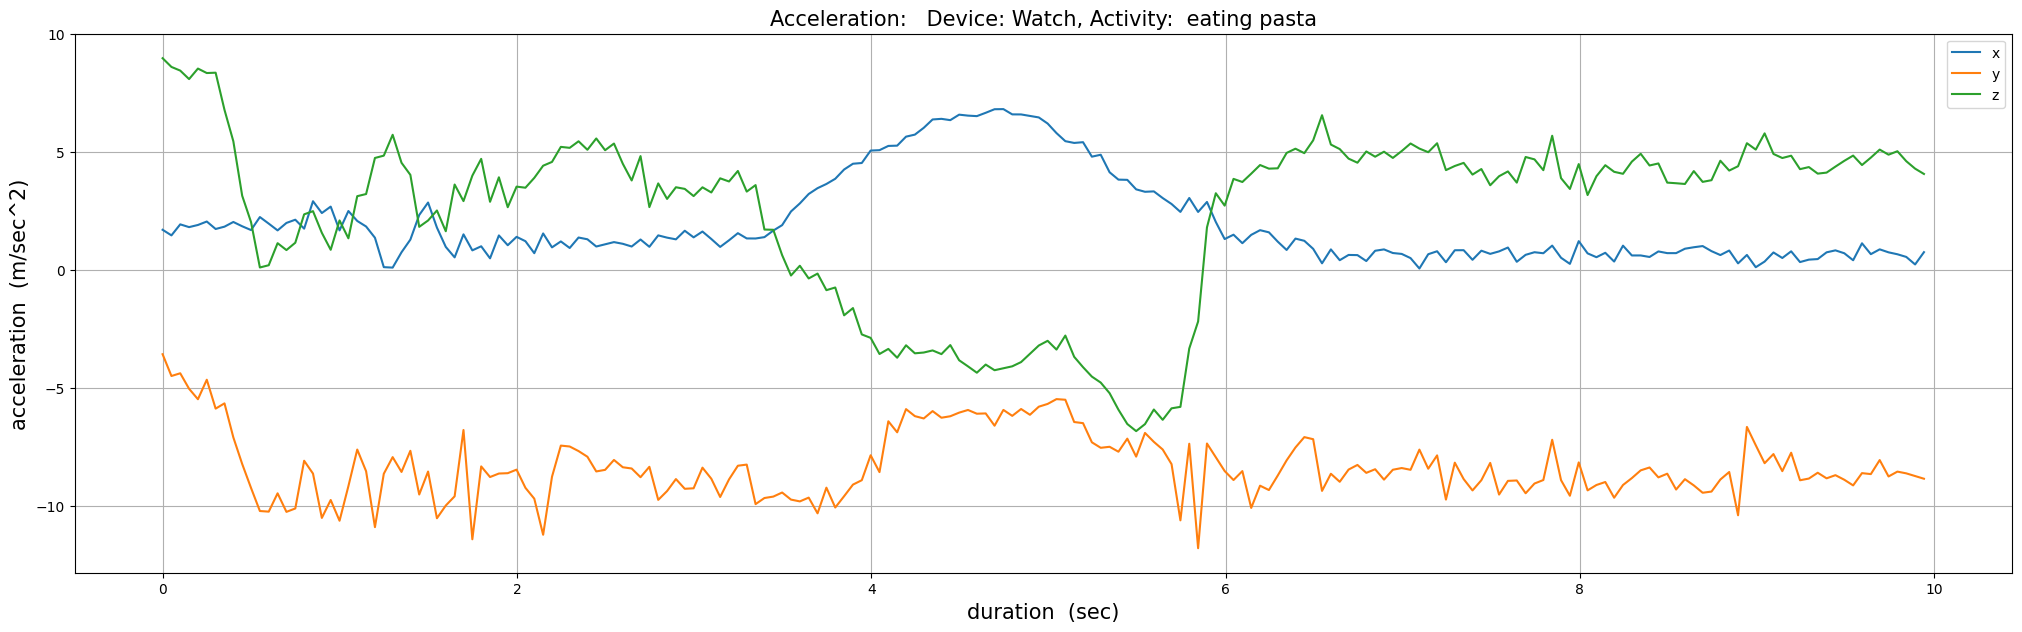

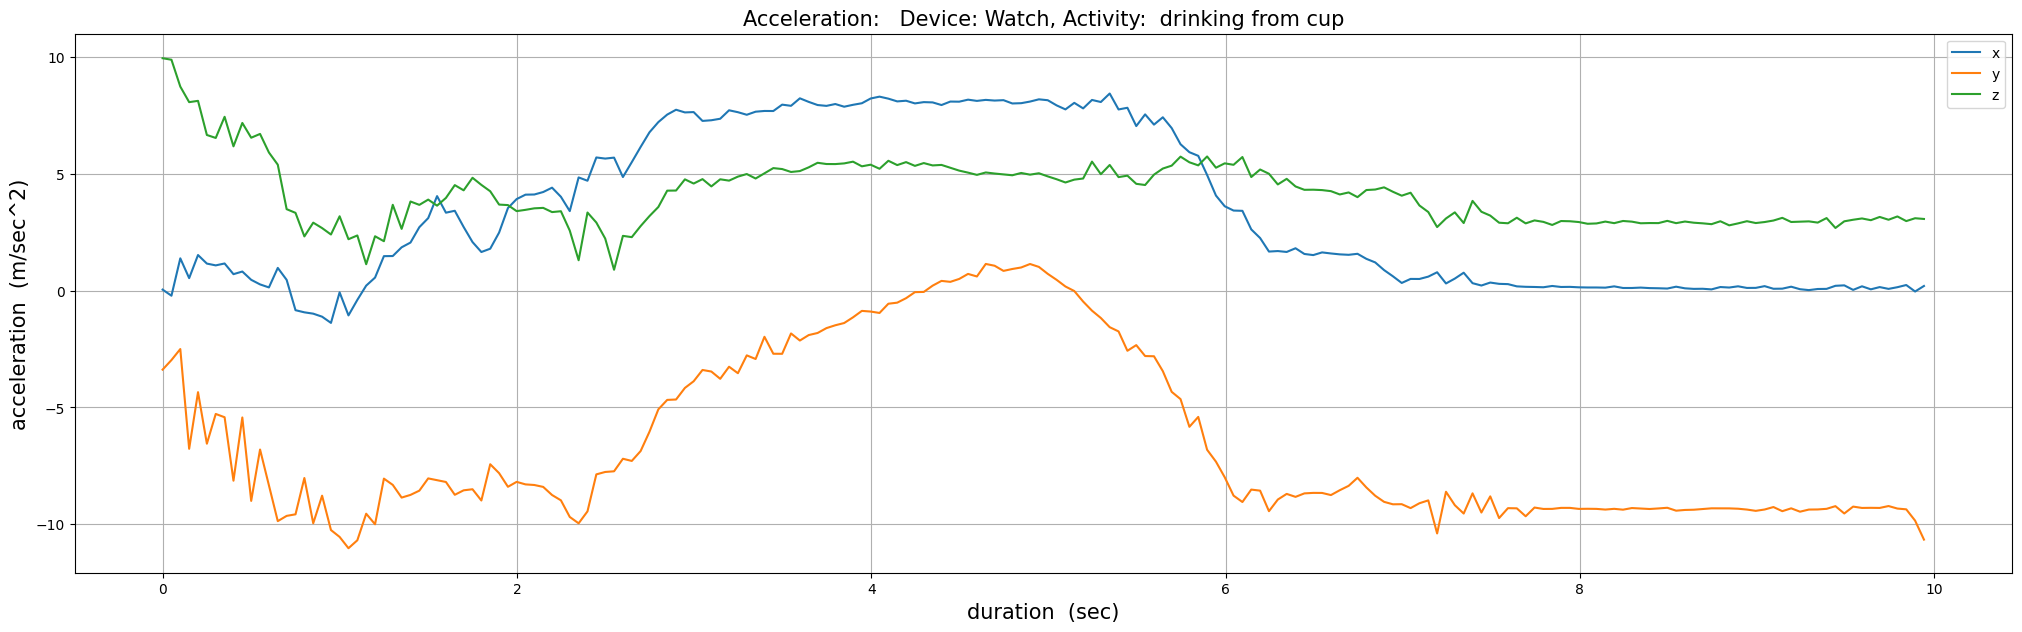

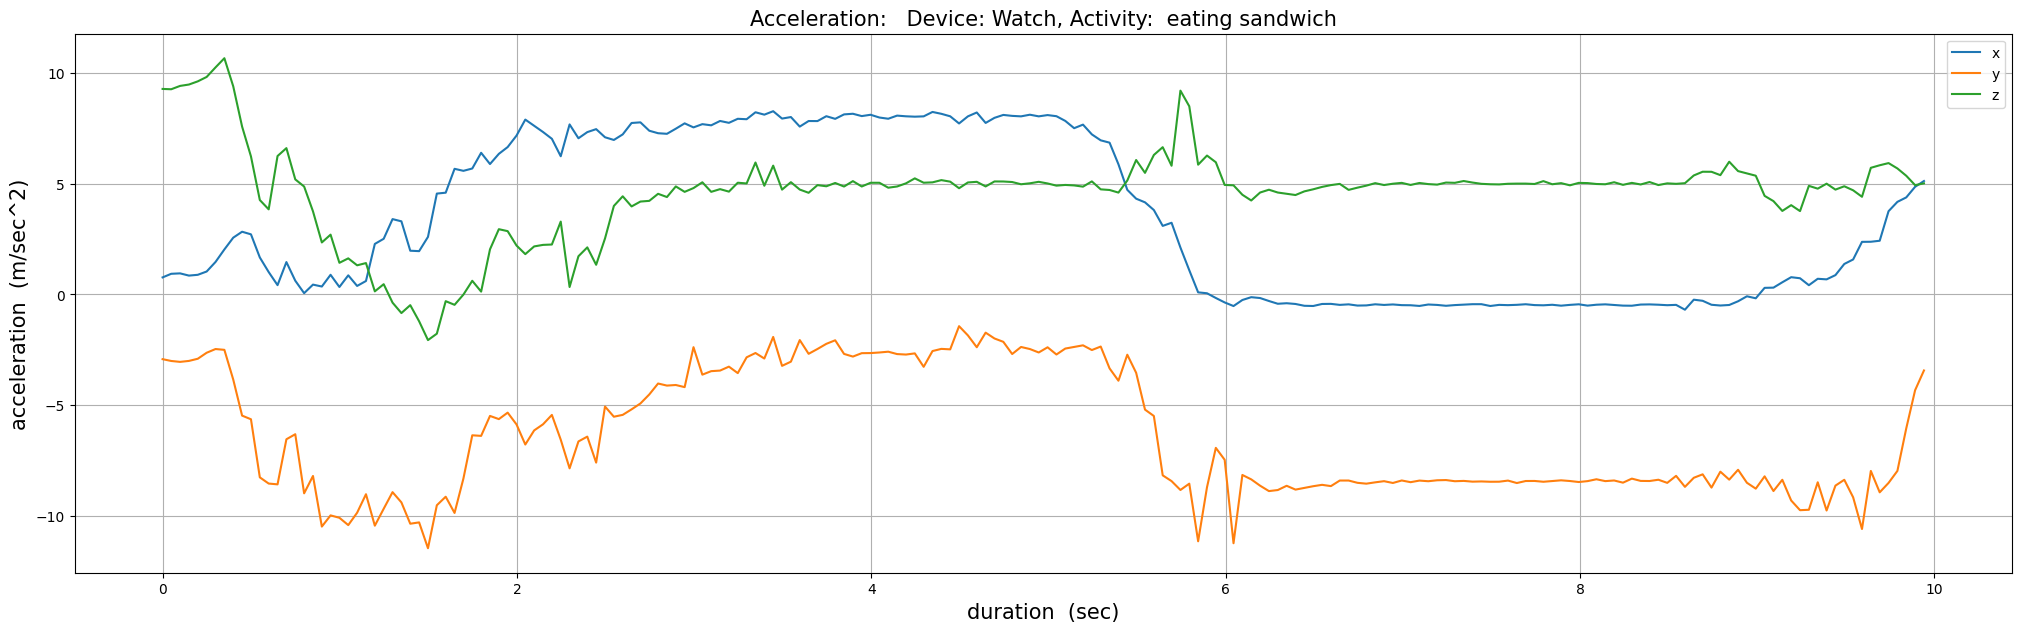

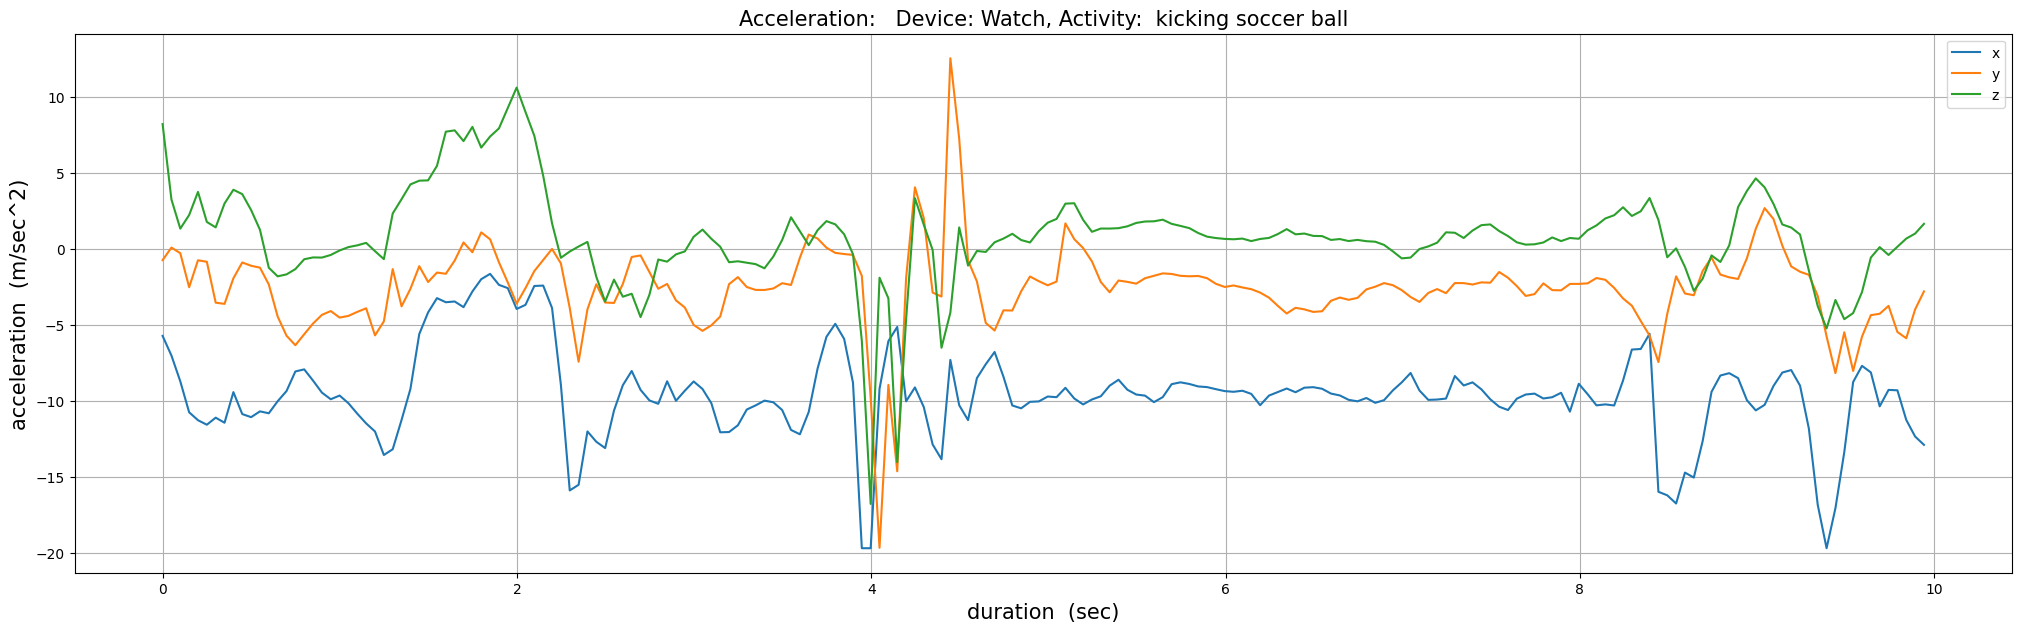

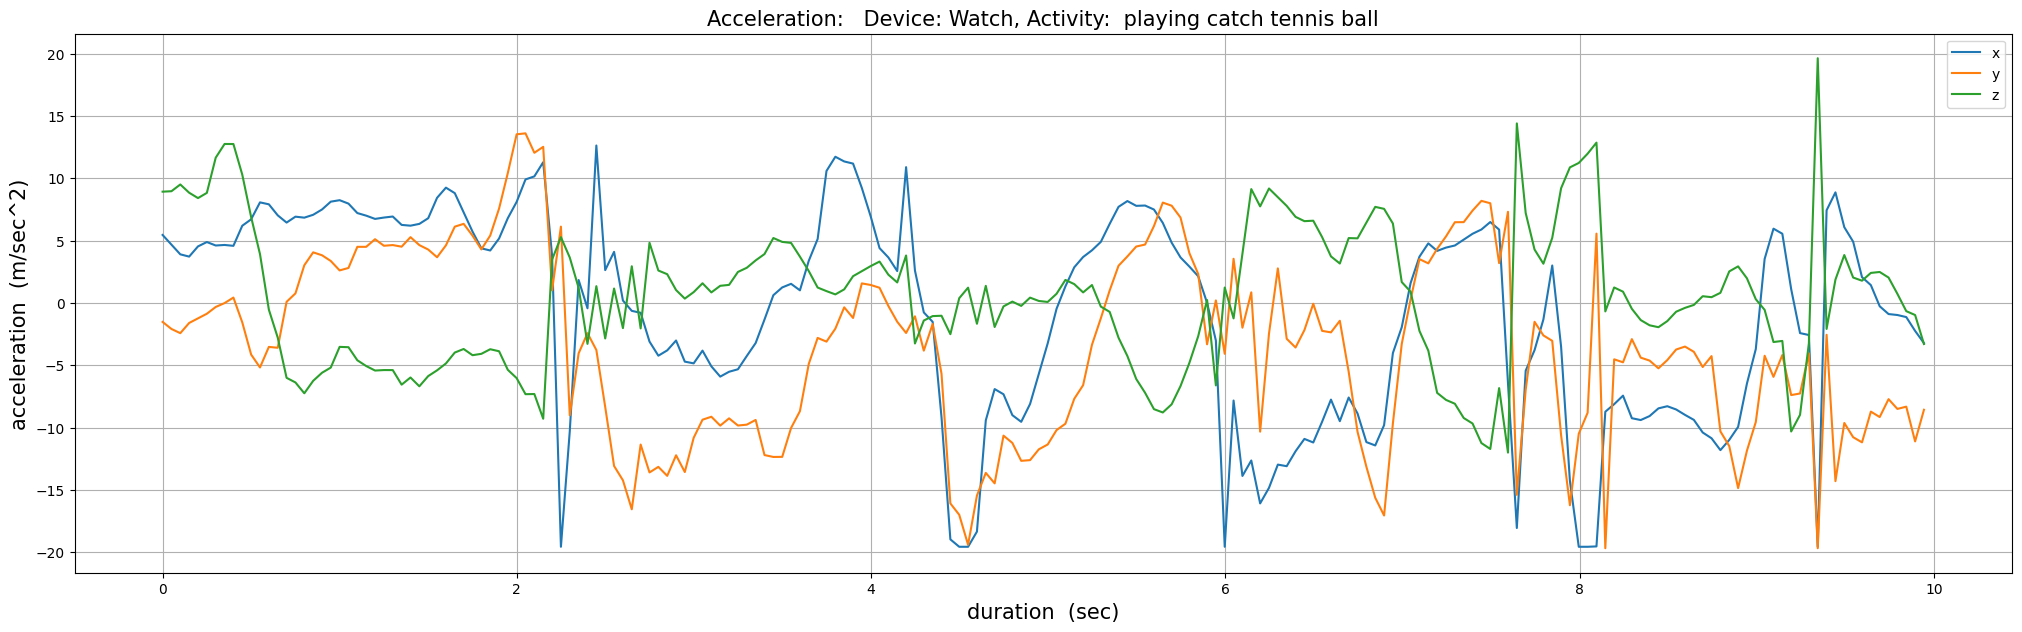

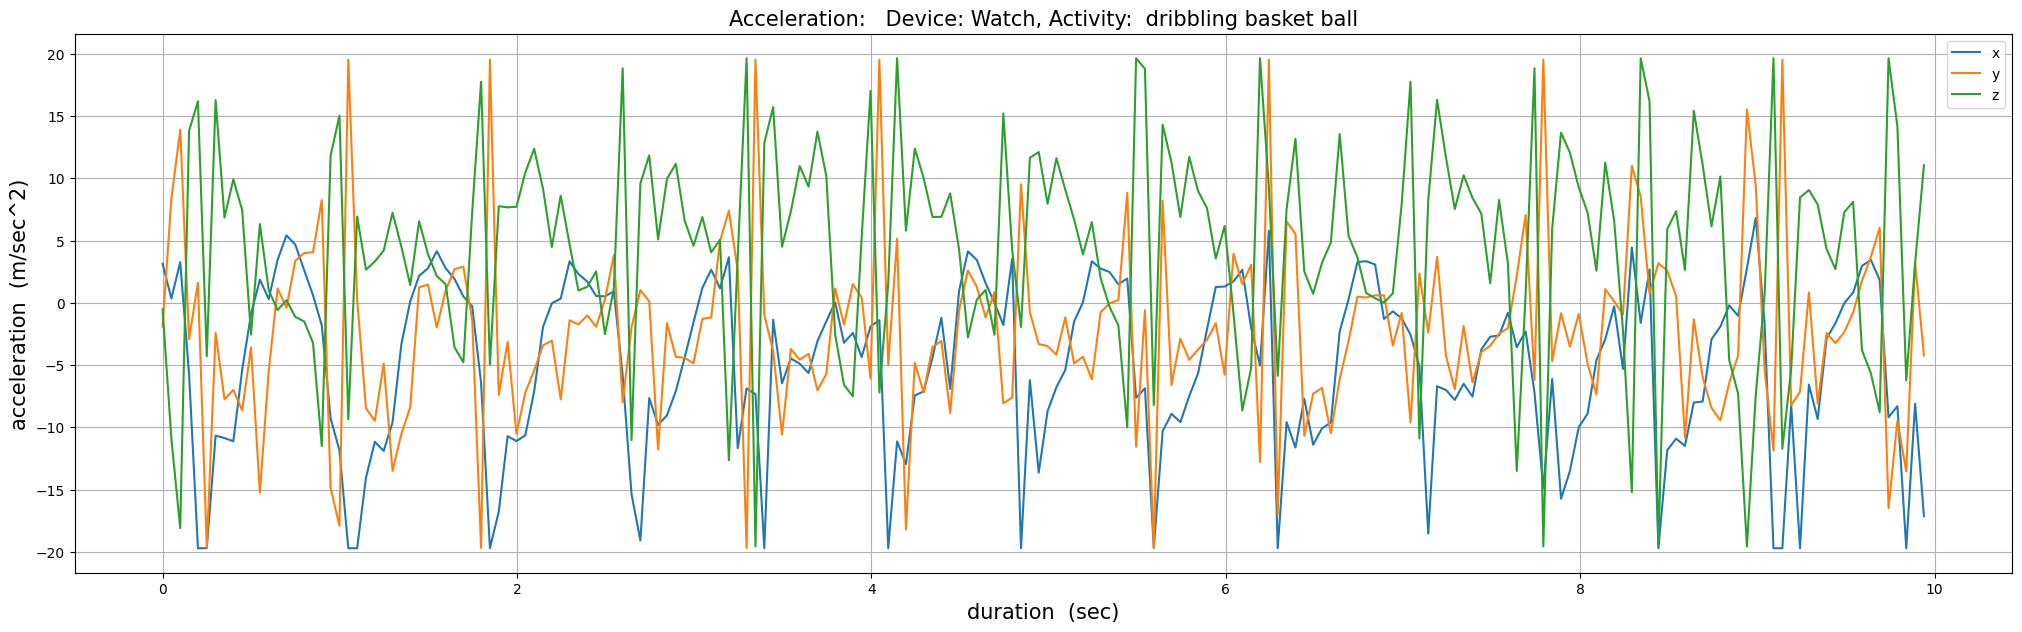

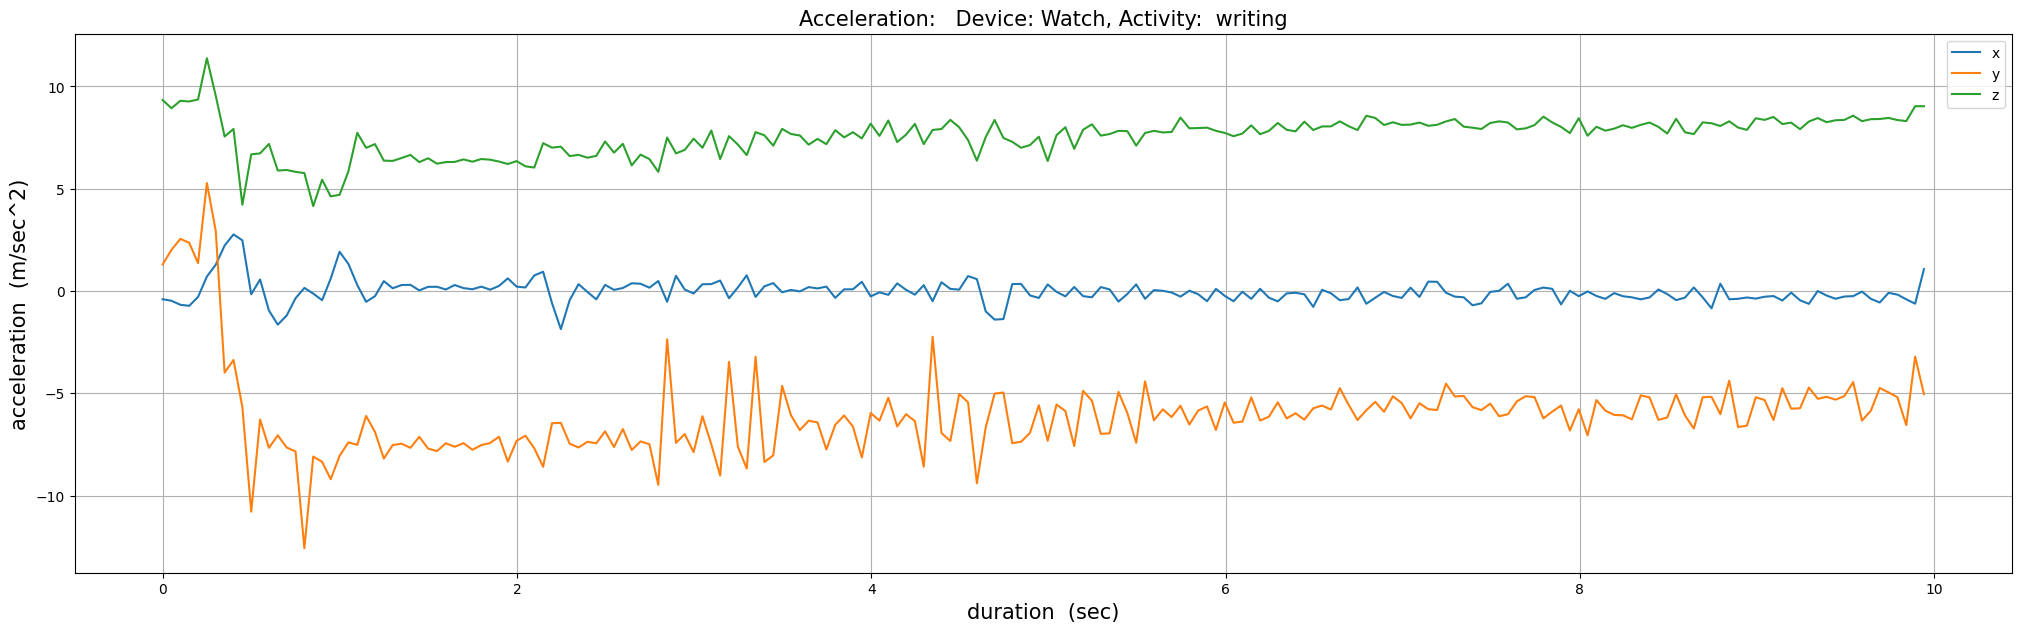

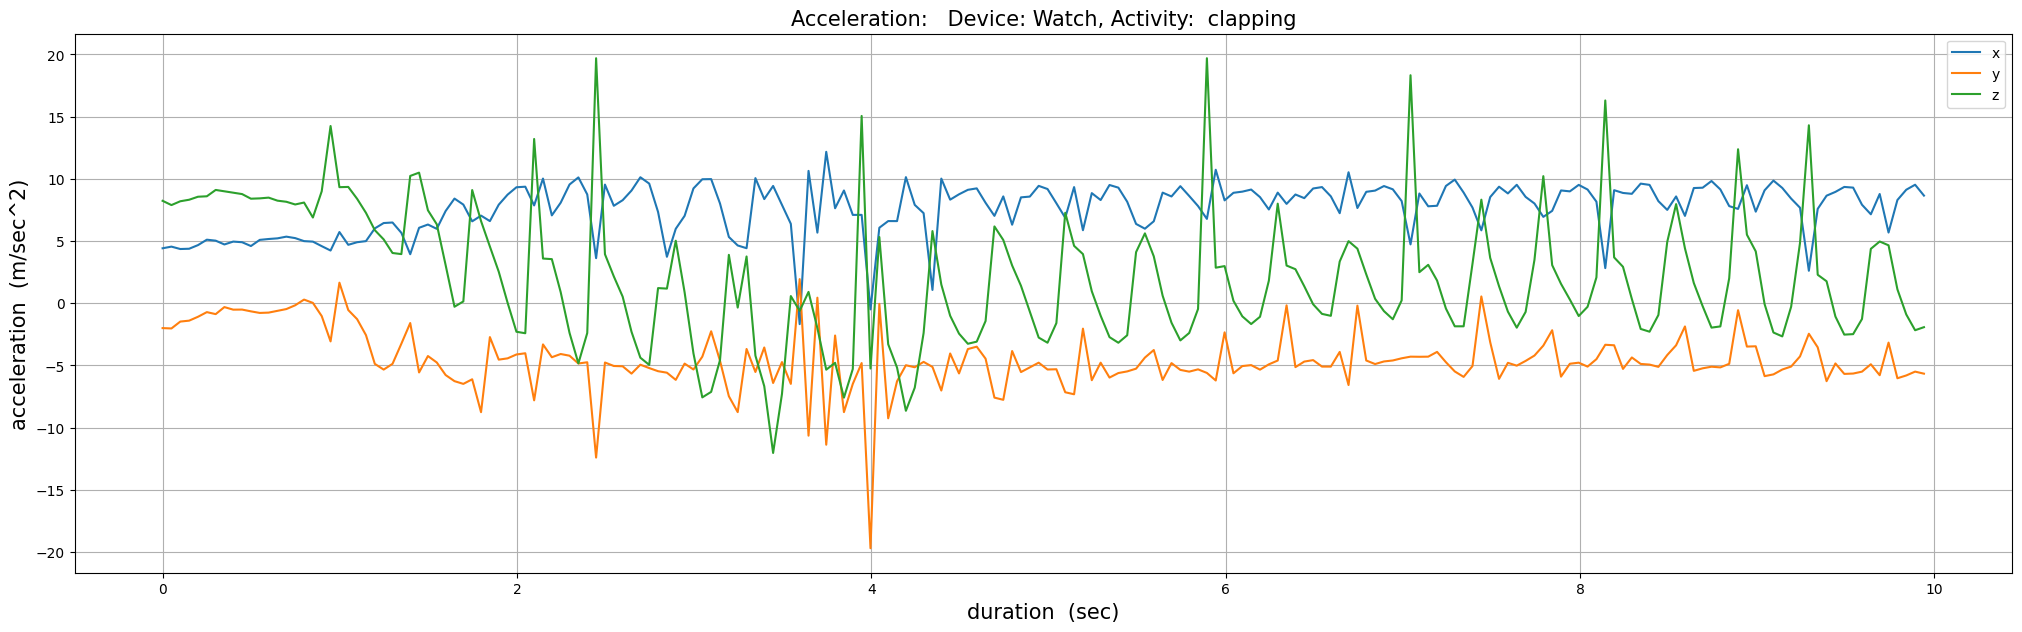

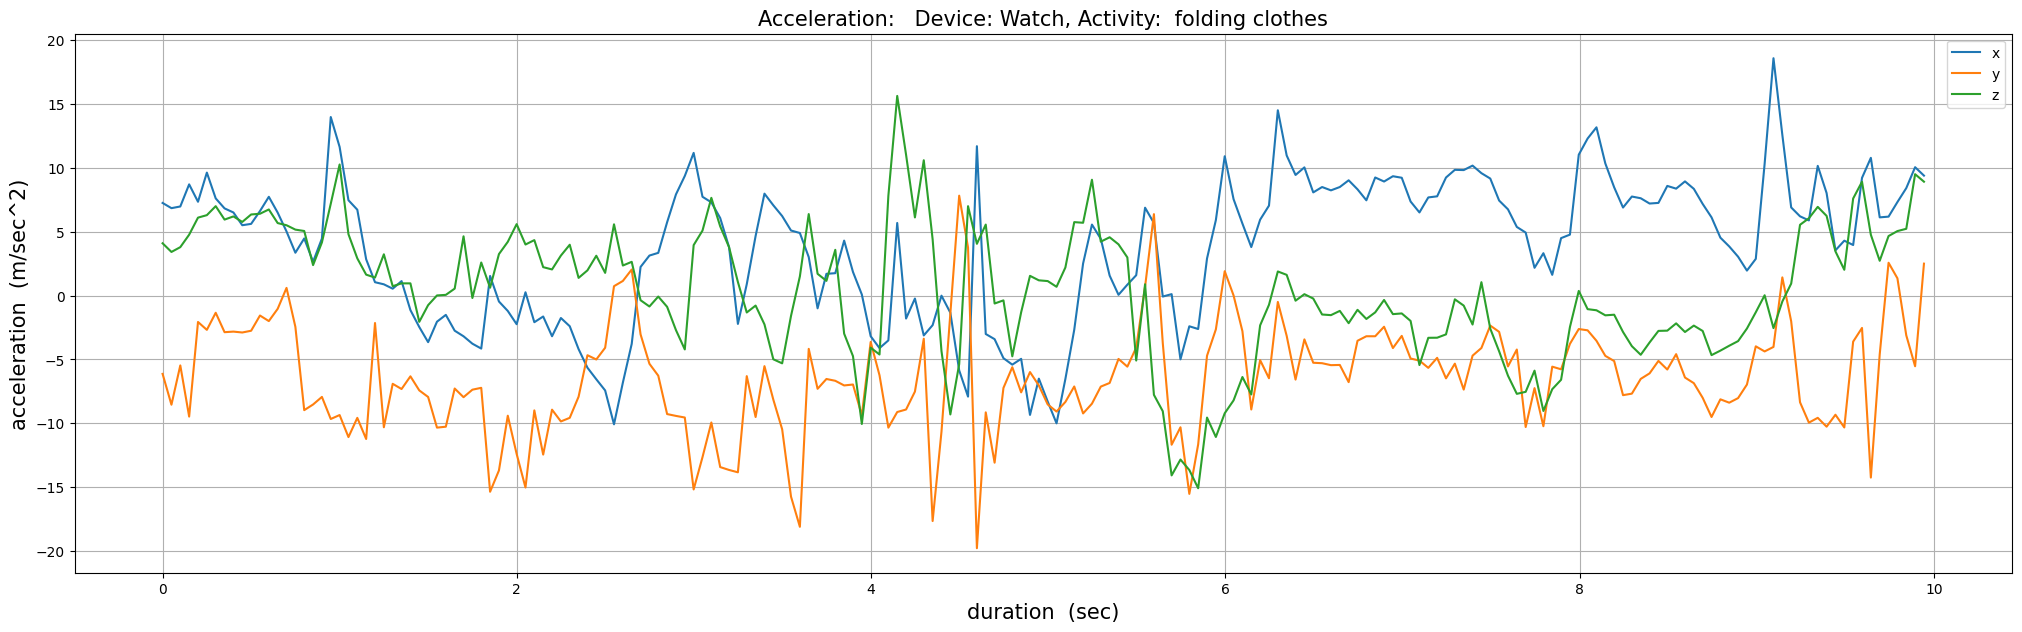

In [6]:
def show_acceleration_per_activity( df, activity, interval_in_sec = None):
    df1 = df.loc[df.activity == activity].copy()
    df1.reset_index(drop = True, inplace = True)
    
    df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds
    
    if interval_in_sec == None:
        ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True)
    else:
        ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True)
    
    ax.set_xlabel('duration  (sec)', fontsize = 15)
    ax.set_ylabel('acceleration  (m/sec^2)',fontsize = 15)
    ax.set_title('Acceleration:   Device: Watch, Activity:  ' + activity, fontsize = 15)

for key in activity_codes_mapping:
    show_acceleration_per_activity(df_wa_p01, activity_codes_mapping[key], 10)


## Watch Gyroscope

In [5]:
df_wg_p01 = pd.read_csv(r'../dataset/raw/watch/gyro/data_1601_gyro_watch.txt', names = ['participant_id' , 'activity_code' , 'timestamp', 'x', 'y', 'z'], index_col=None, header=None)
df_wg_p01.z = df_wg_p01.z.str.strip(';')
df_wg_p01.z = pd.to_numeric(df_wg_p01.z)

df_wg_p01['activity'] = df_wg_p01['activity_code'].map(activity_codes_mapping)
df_wg_p01 = df_wg_p01[['participant_id', 'activity_code', 'activity', 'timestamp', 'x', 'y', 'z']]

df_wg_p01

participant_id activity_code         activity         timestamp  \
0                1601             A          walking  1896411611733301   
1                1601             A          walking  1896411661695801   
2                1601             A          walking  1896411711658874   
3                1601             A          walking  1896411761623926   
4                1601             A          walking  1896411811593717   
...               ...           ...              ...               ...   
64824            1601             S  folding clothes  1890263614217010   
64825            1601             S  folding clothes  1890263664188560   
64826            1601             S  folding clothes  1890263714160022   
64827            1601             S  folding clothes  1890263764099780   
64828            1601             S  folding clothes  1890263814039267   

              x         y         z  
0      0.703360 -0.436308 -0.953889  
1      0.254884 -0.424590 -0.993304  
2      0.301756 -0.222190 -0.949628  
3      0.287907 -0.141230 -1.095569  
4      0.402956  0.272093 -1.006087  
...         ...       ...       ...  
64824  0.723241  0.378951 -0.126360  
64825  0.222569  1.128895 -0.416112  
64826  0.332291  1.107589 -0.382024  
64827 -0.184362  1.096937 -1.043553  
64828 -1.254953  1.030890 -1.645428  

[64829 rows x 7 columns]

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

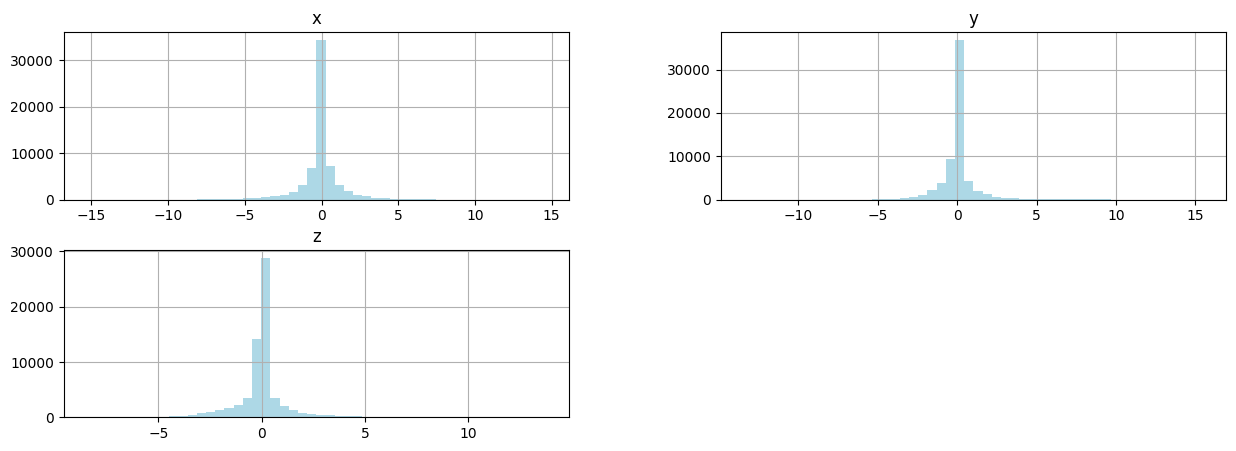

In [10]:
df_wg_p01[['x', 'y', 'z']].hist(bins = 50, figsize = (15, 5), color='lightblue')

    - Observation
        - Data is zero centred, low level, symmetrical in all axes. However, angular velocities of hand movements (watch) are, typically, greater than of body (phone)

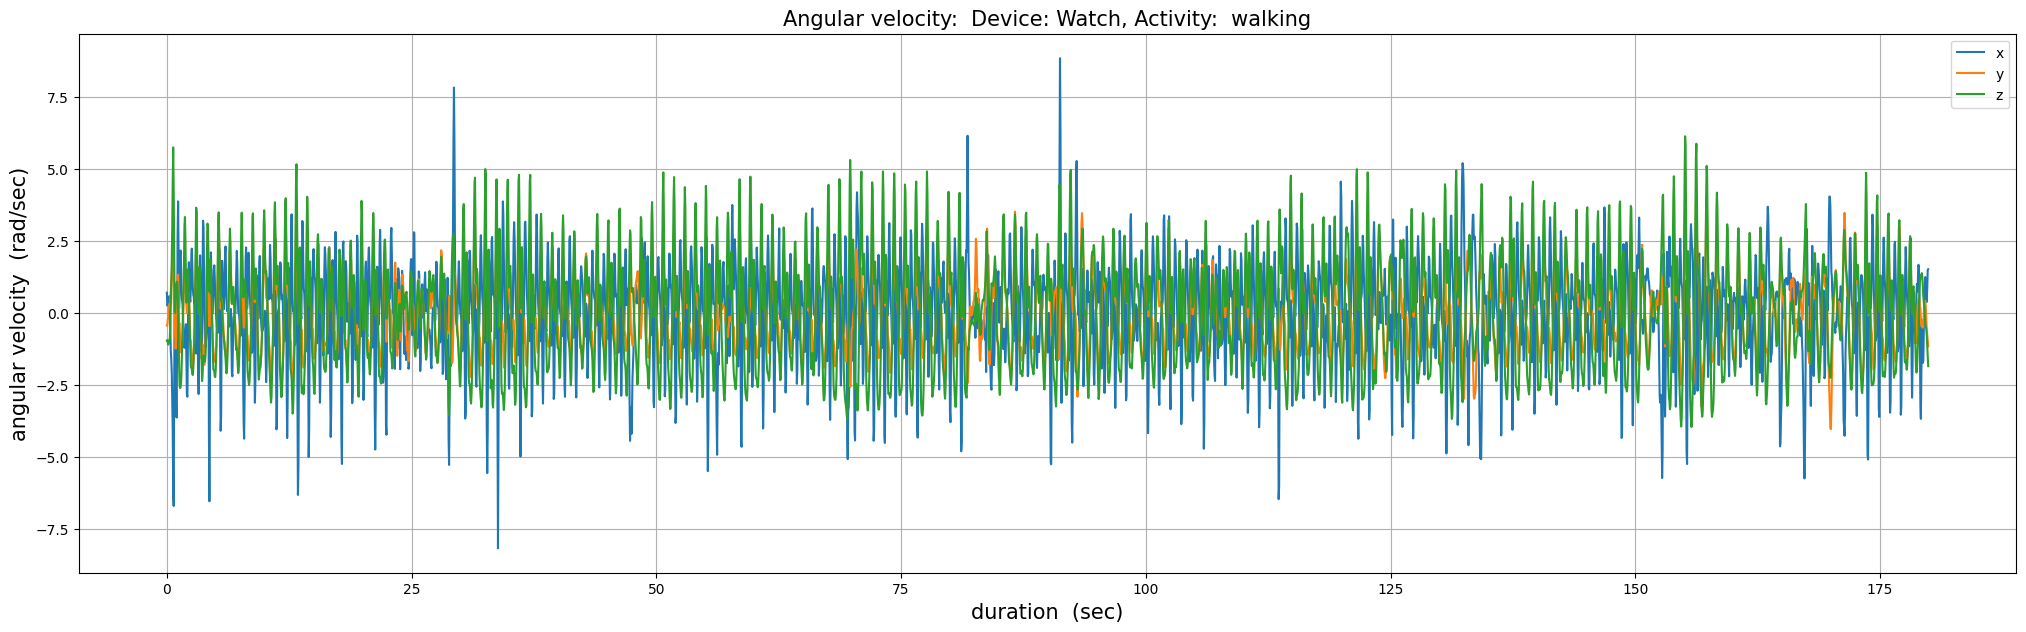

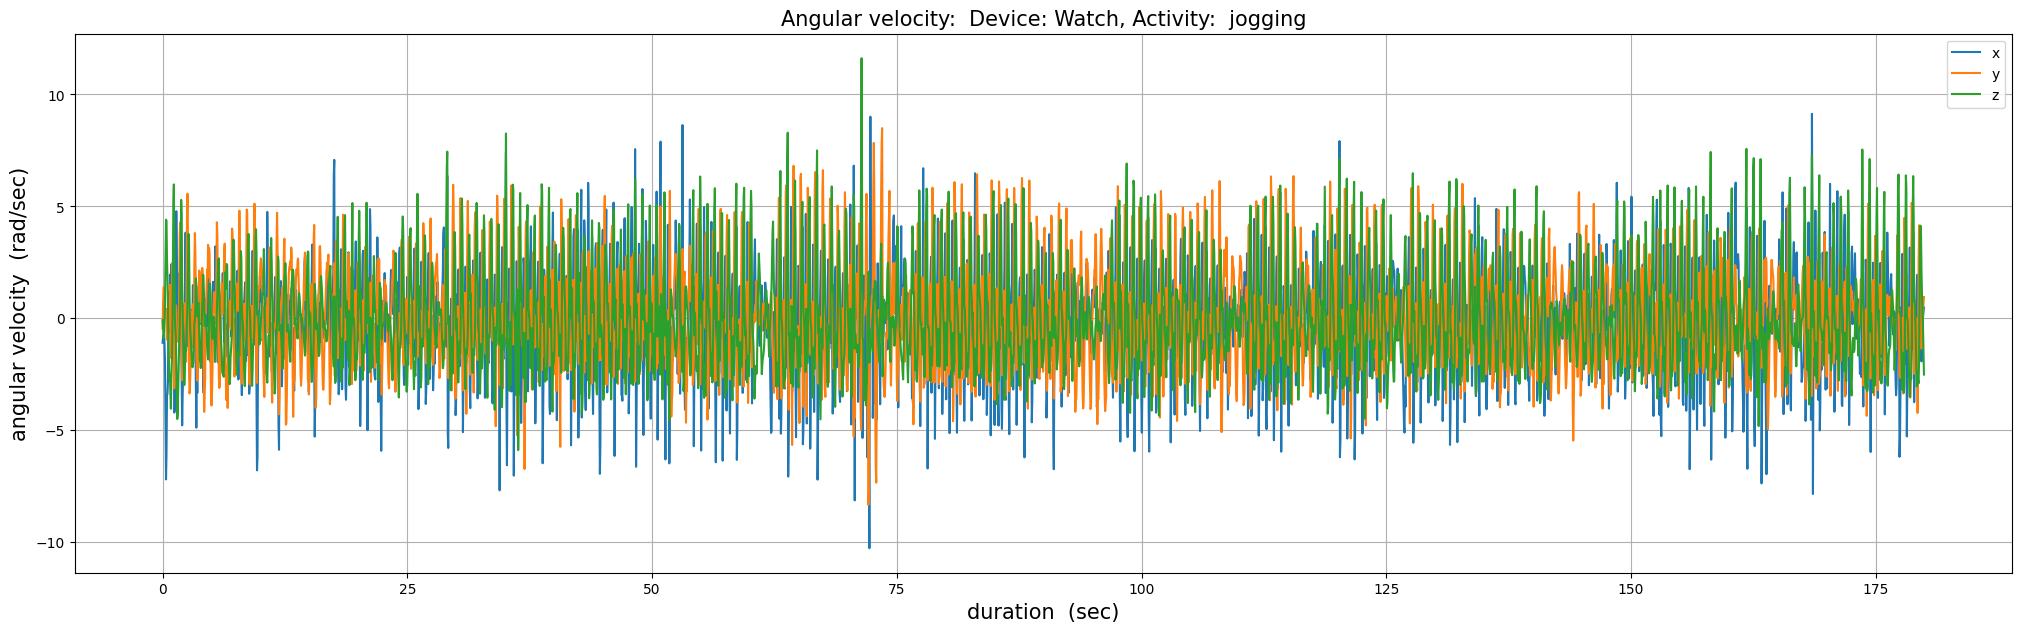

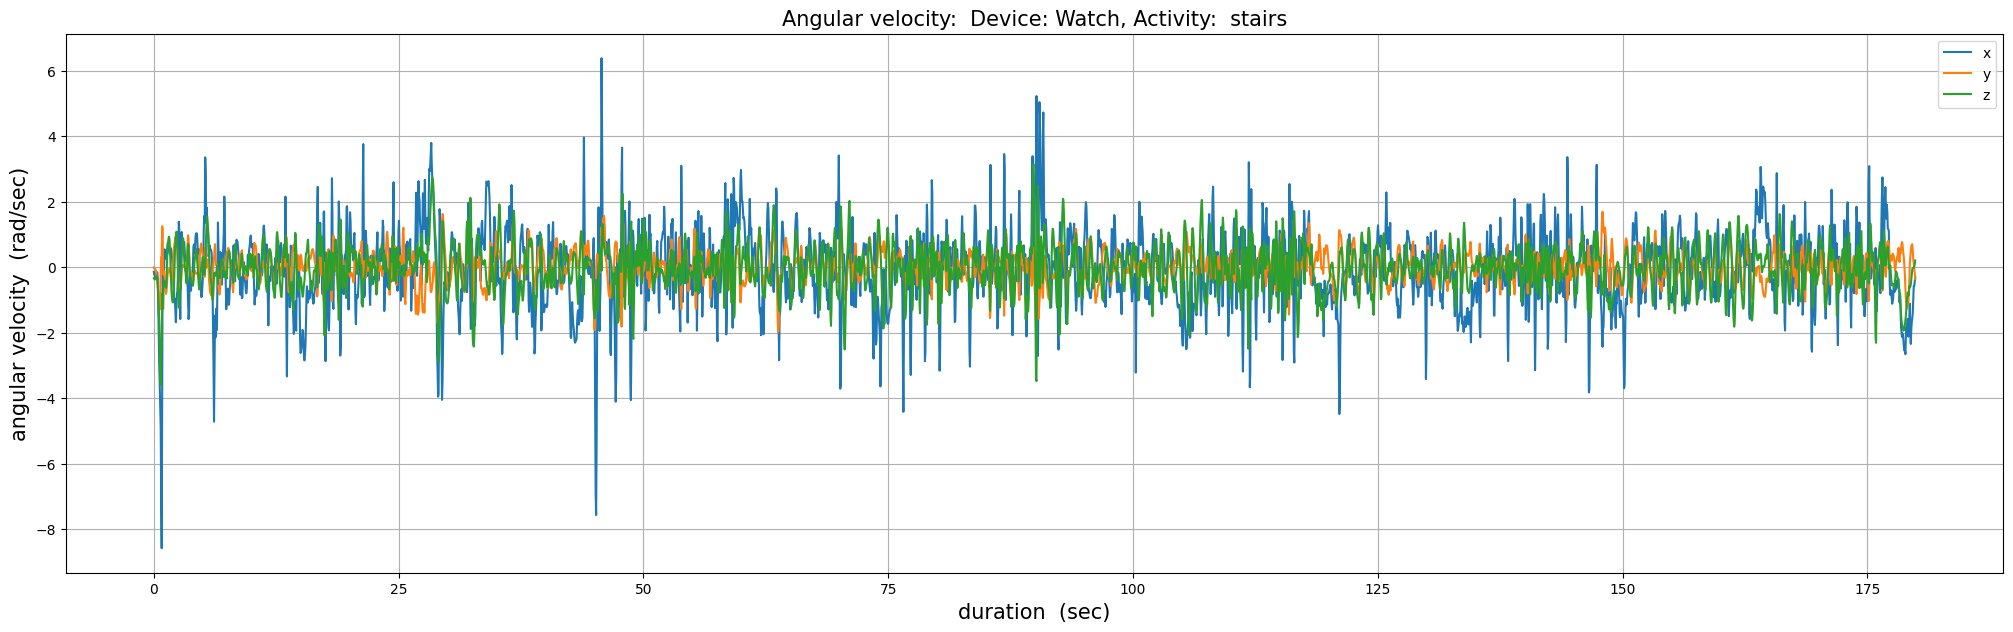

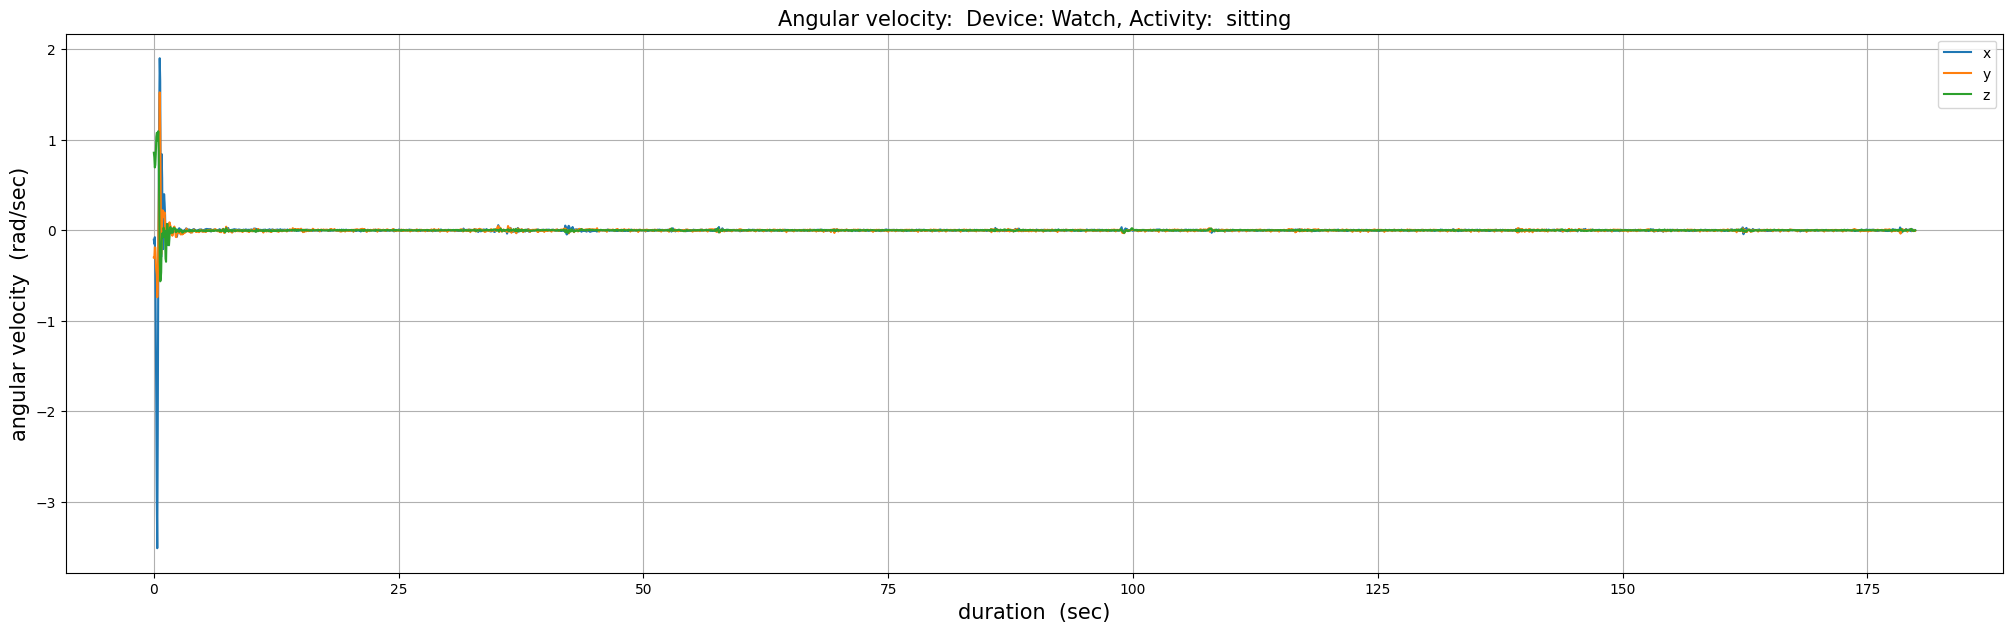

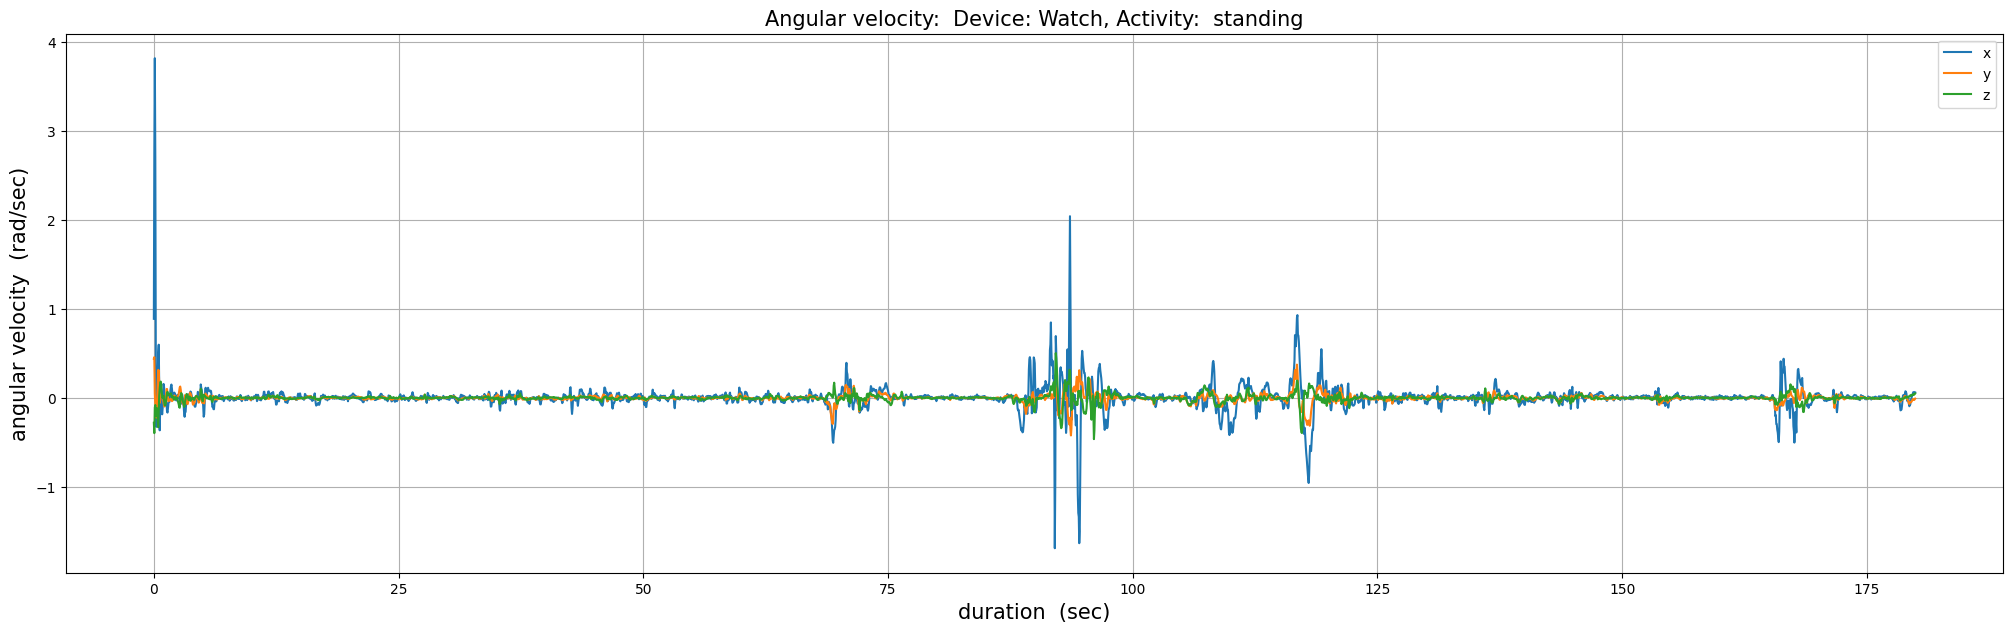

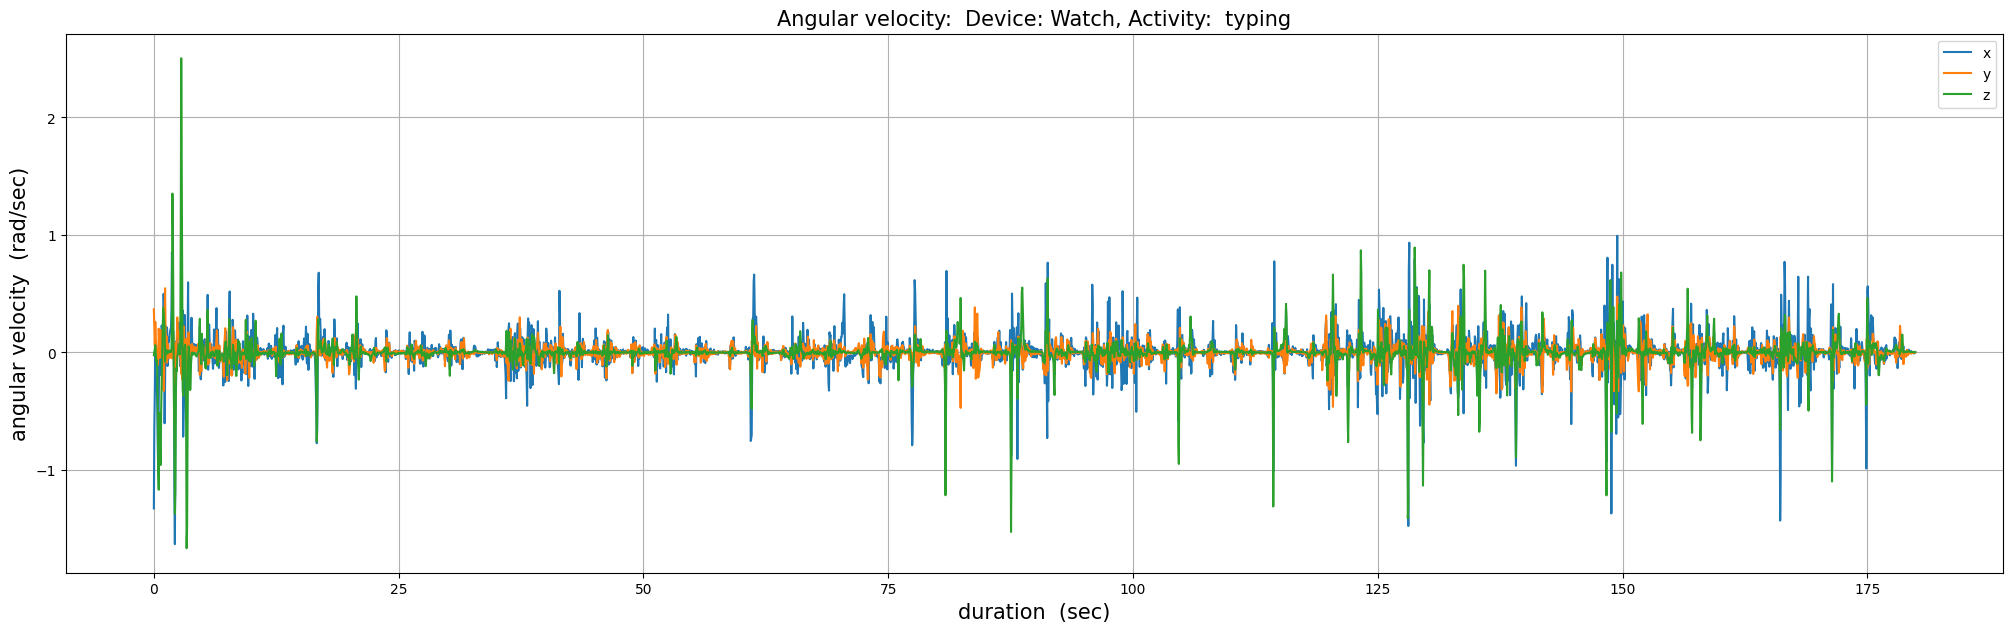

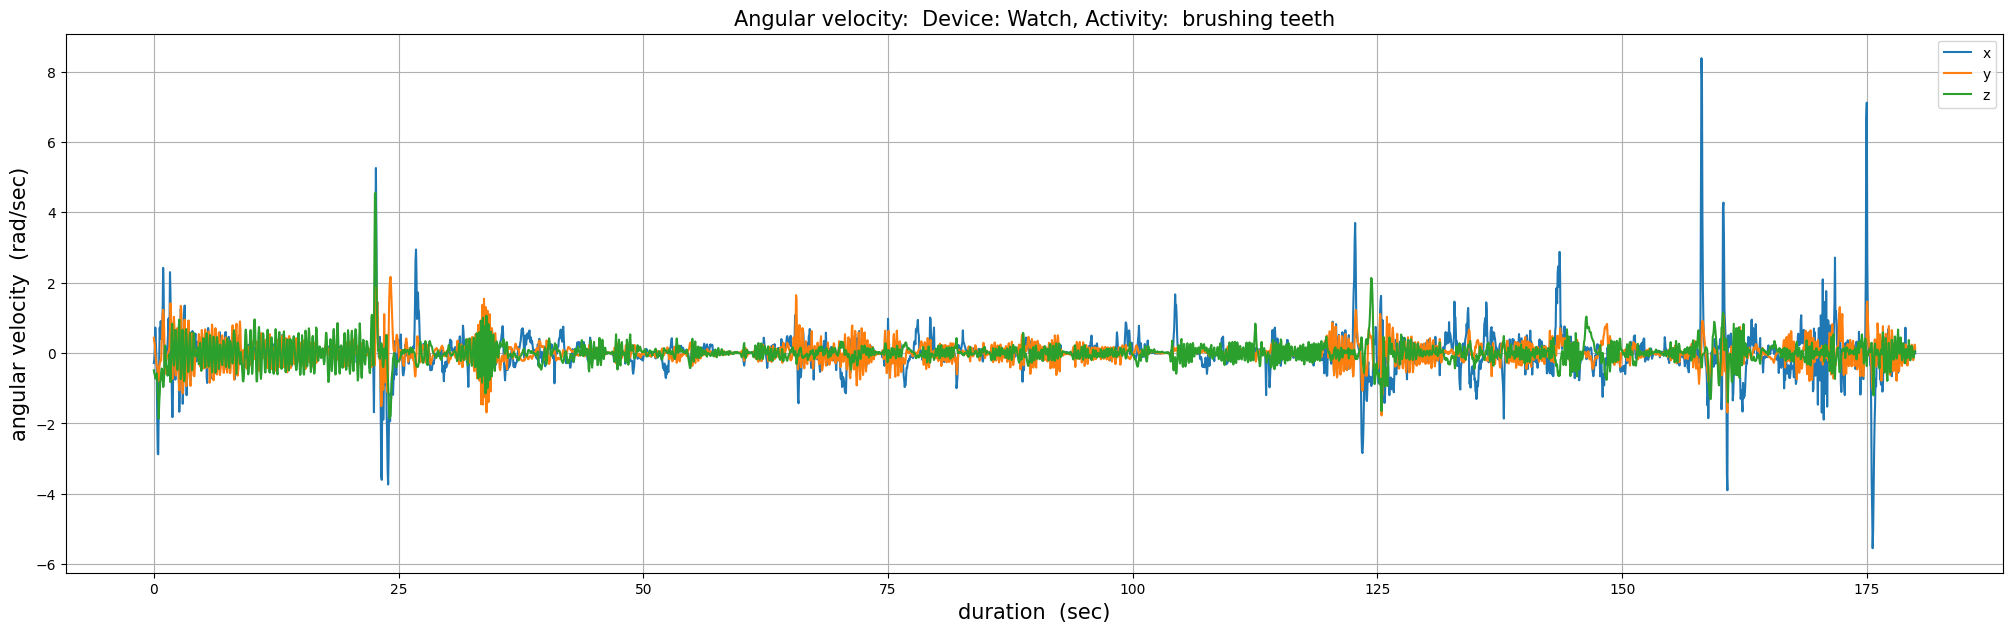

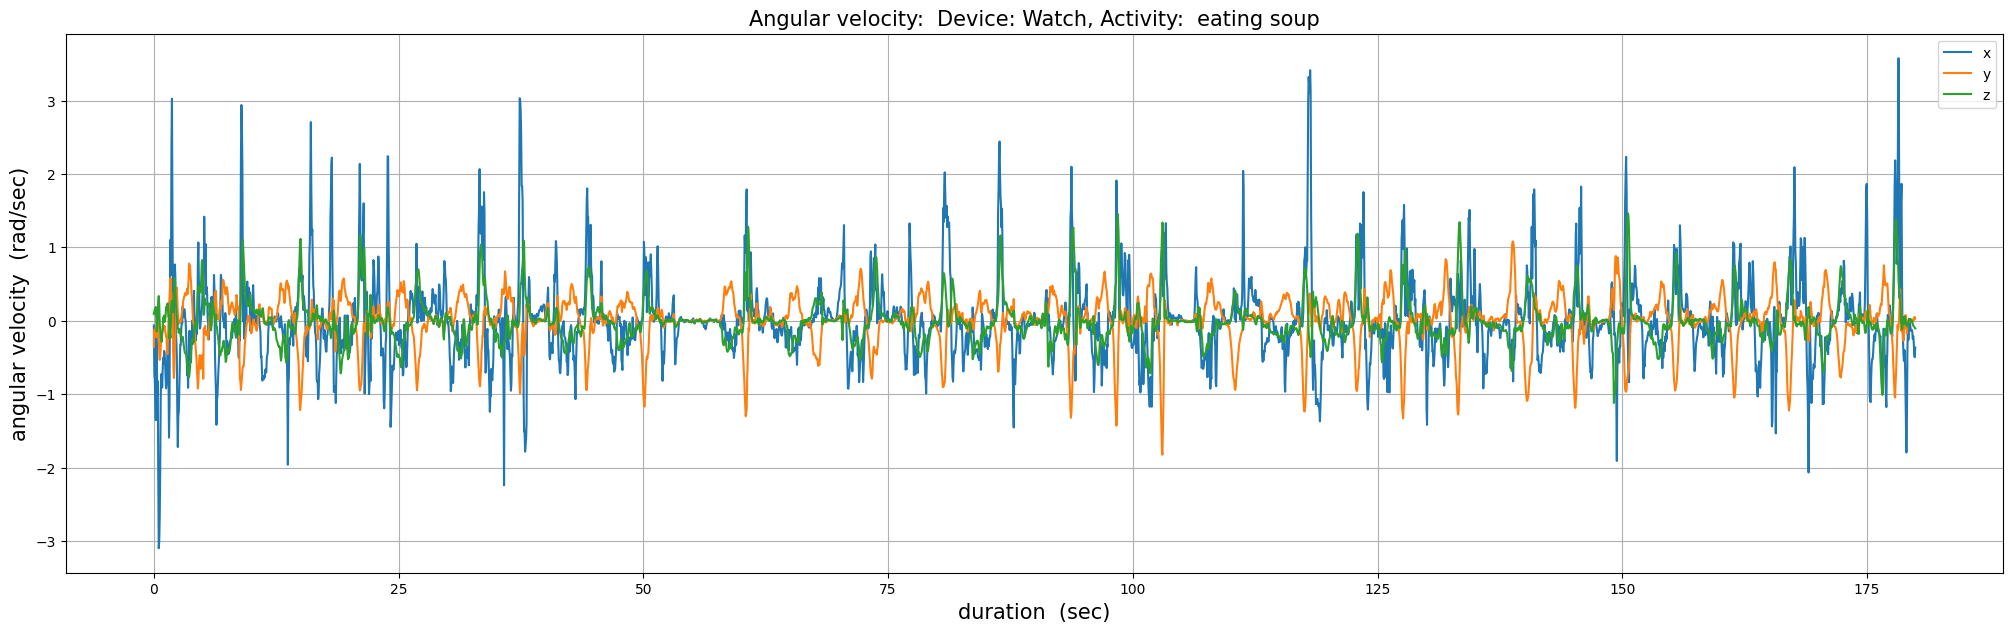

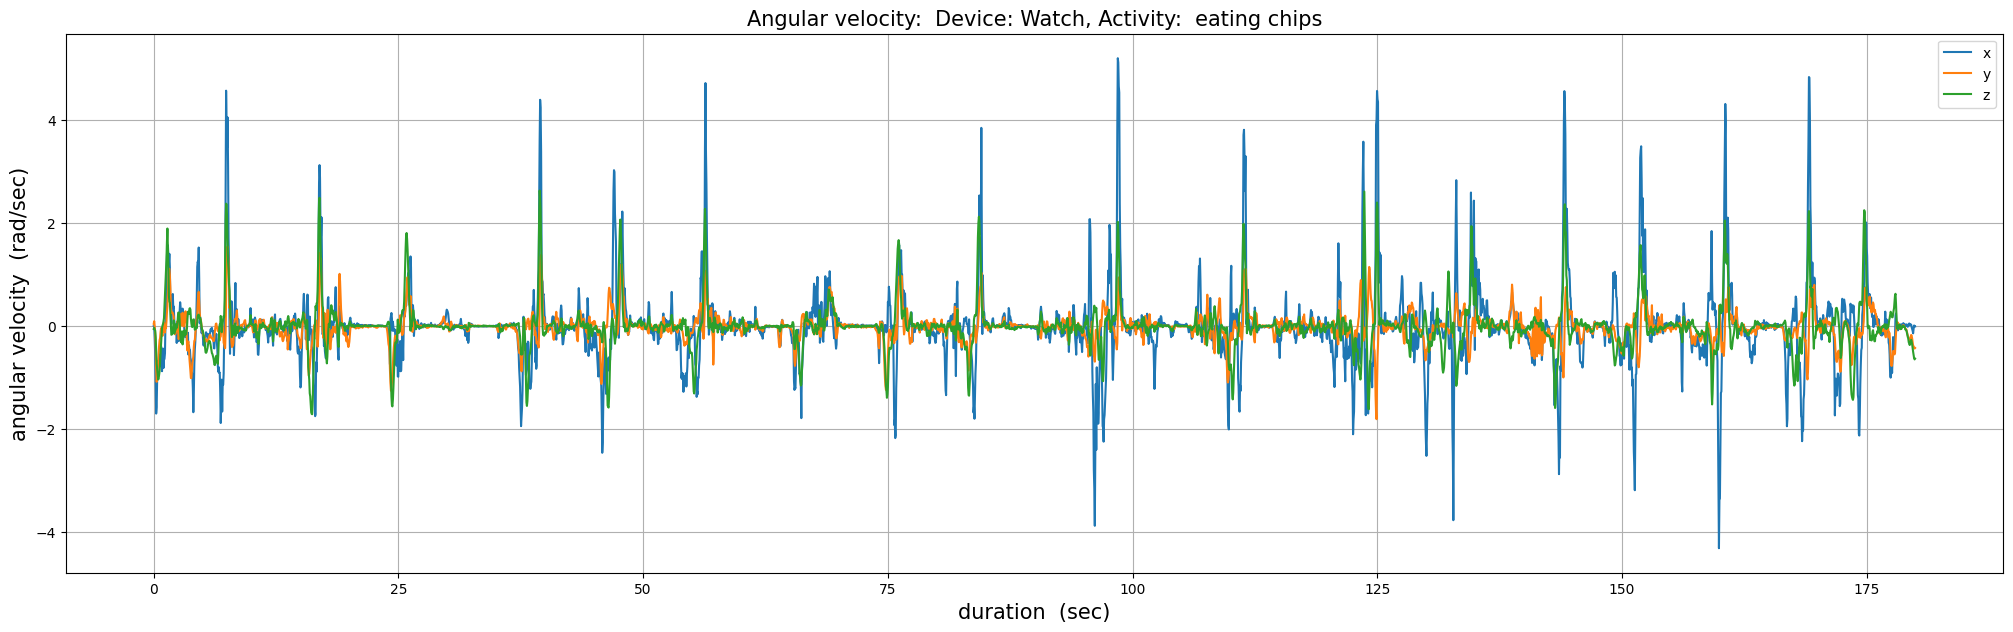

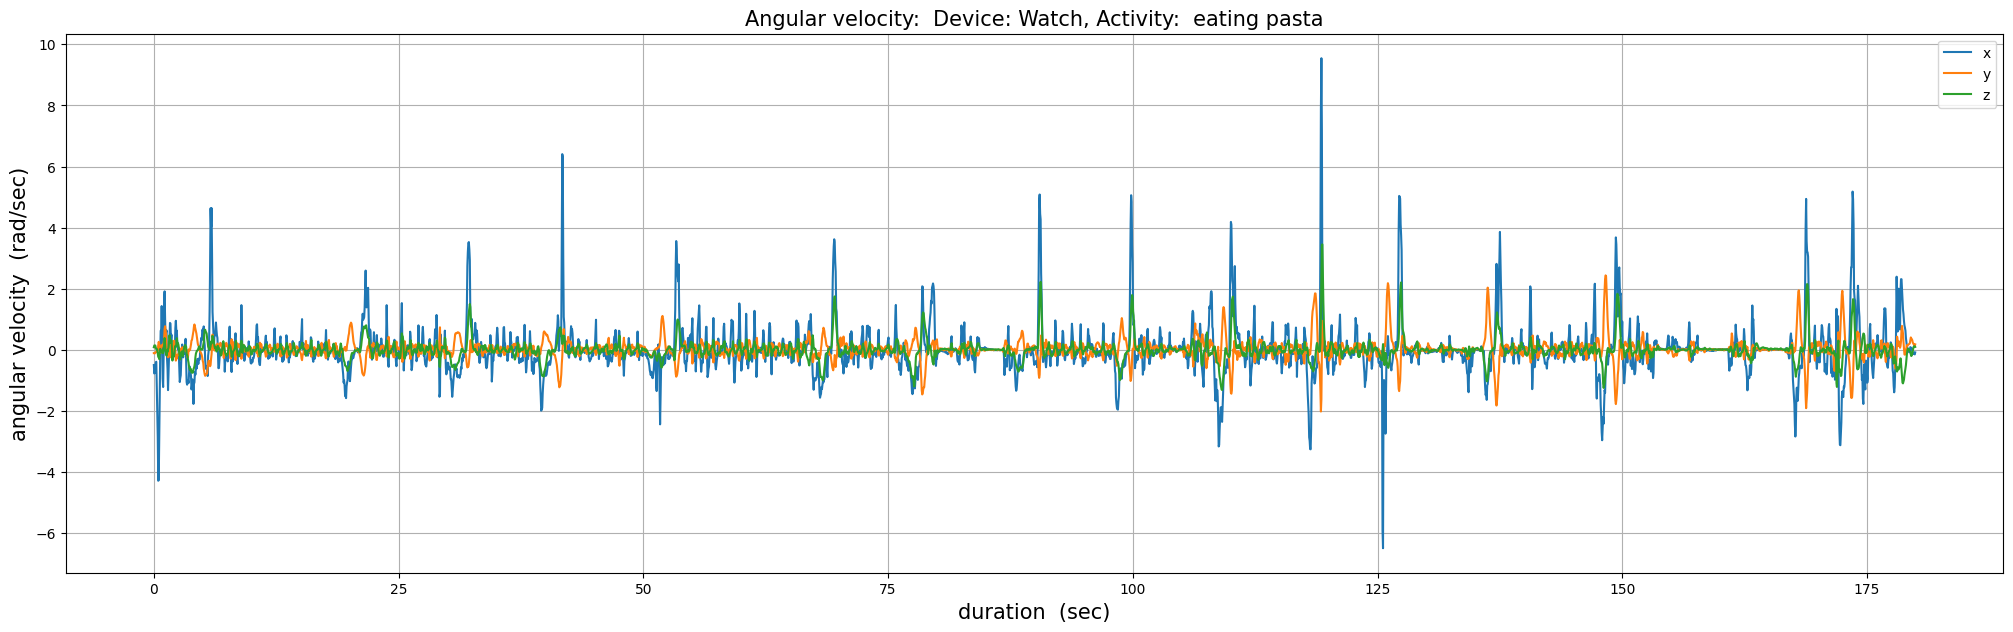

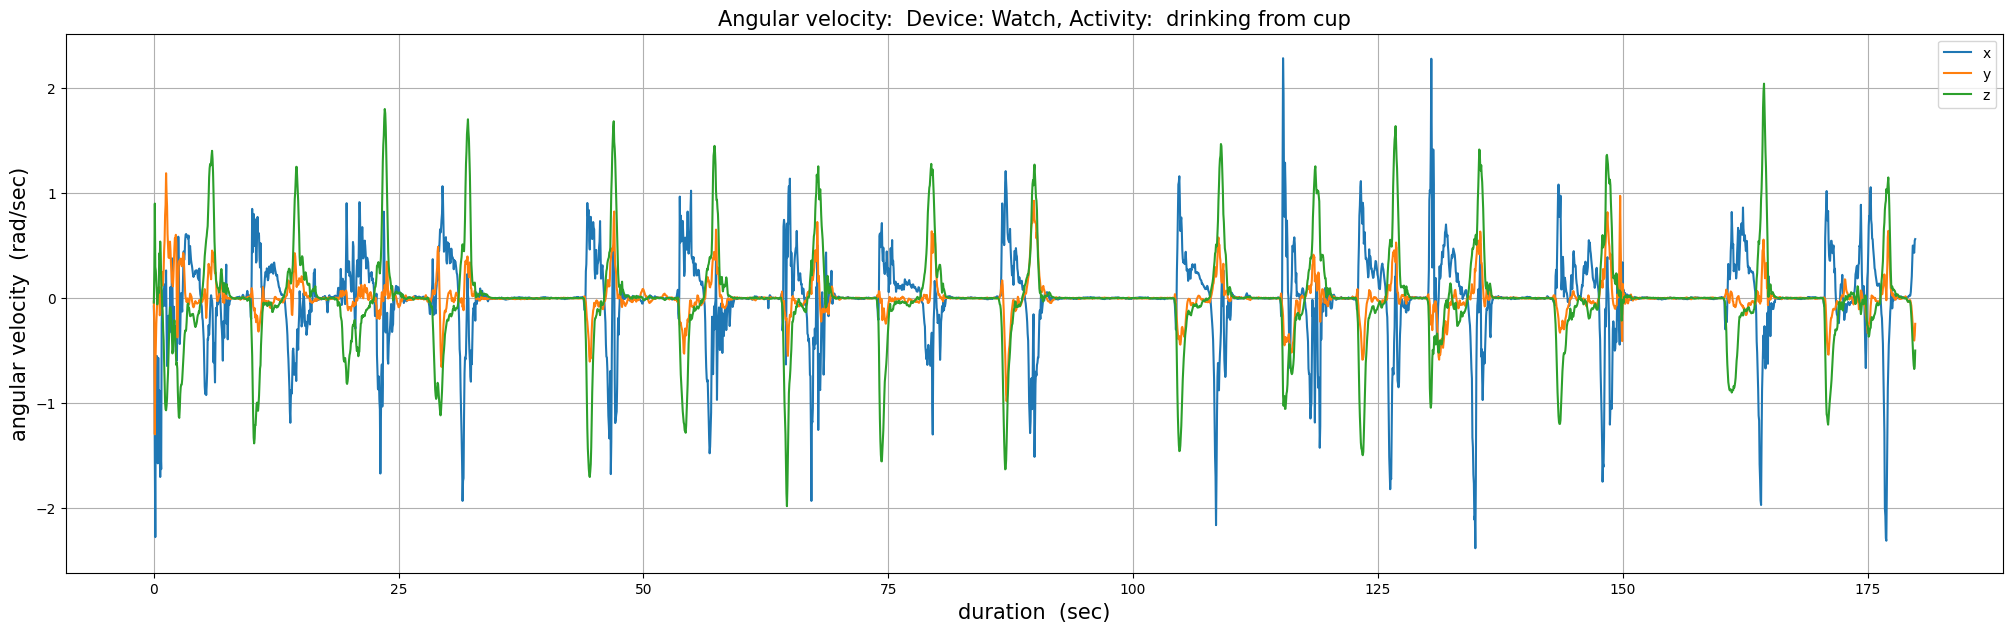

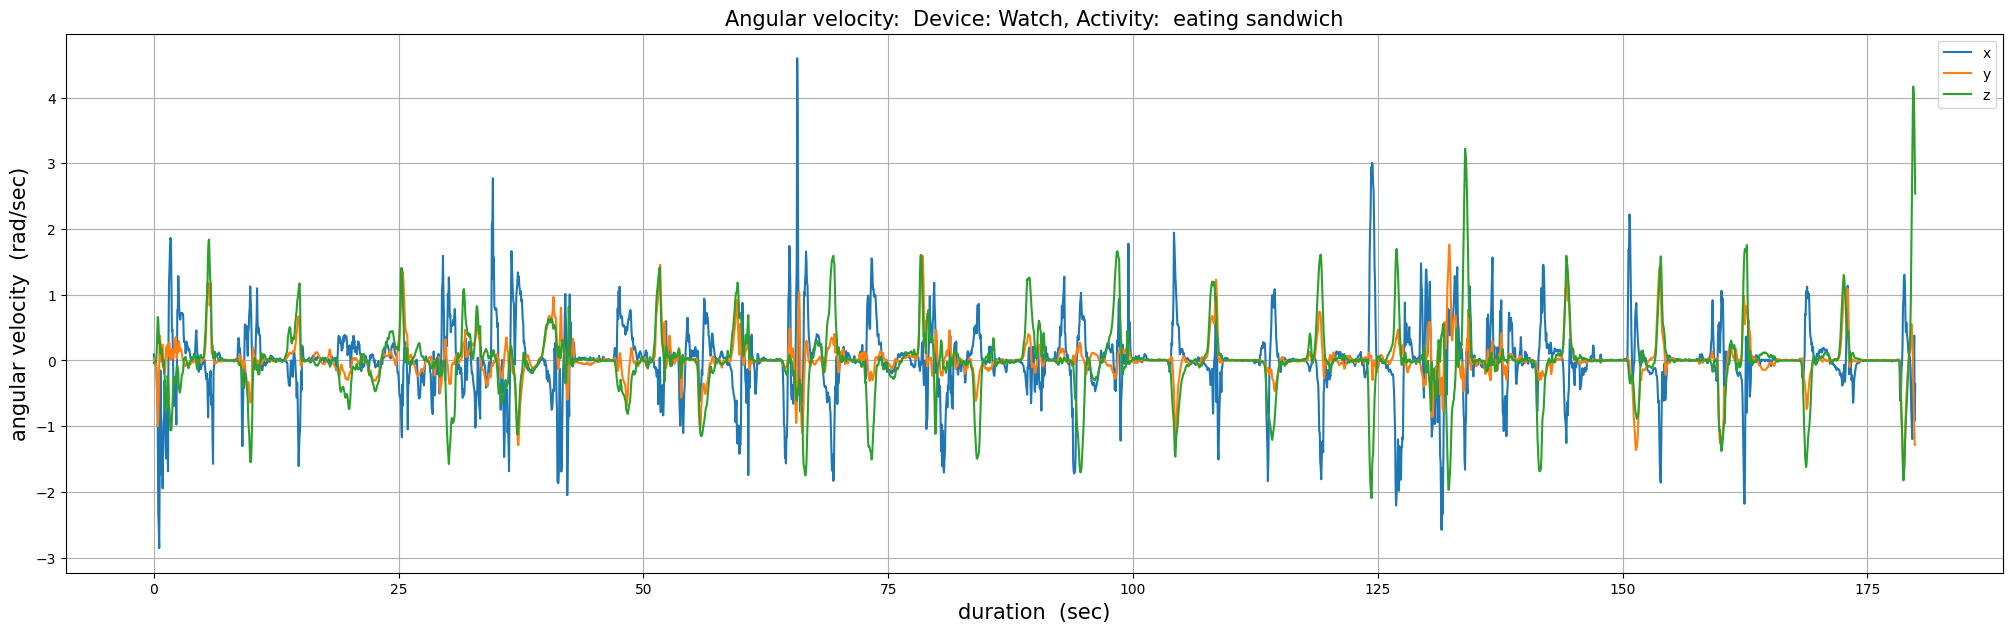

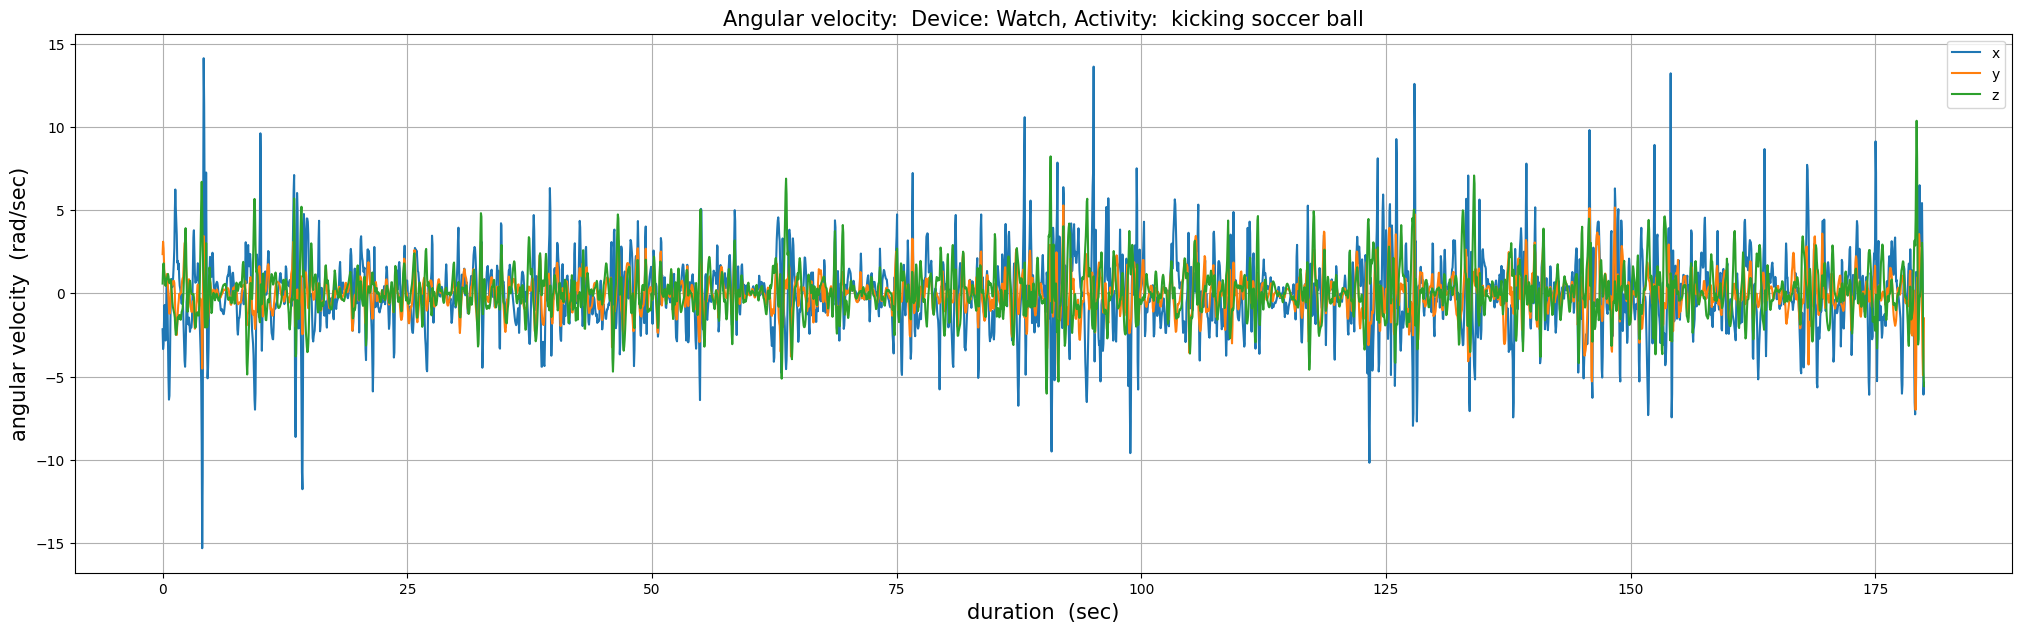

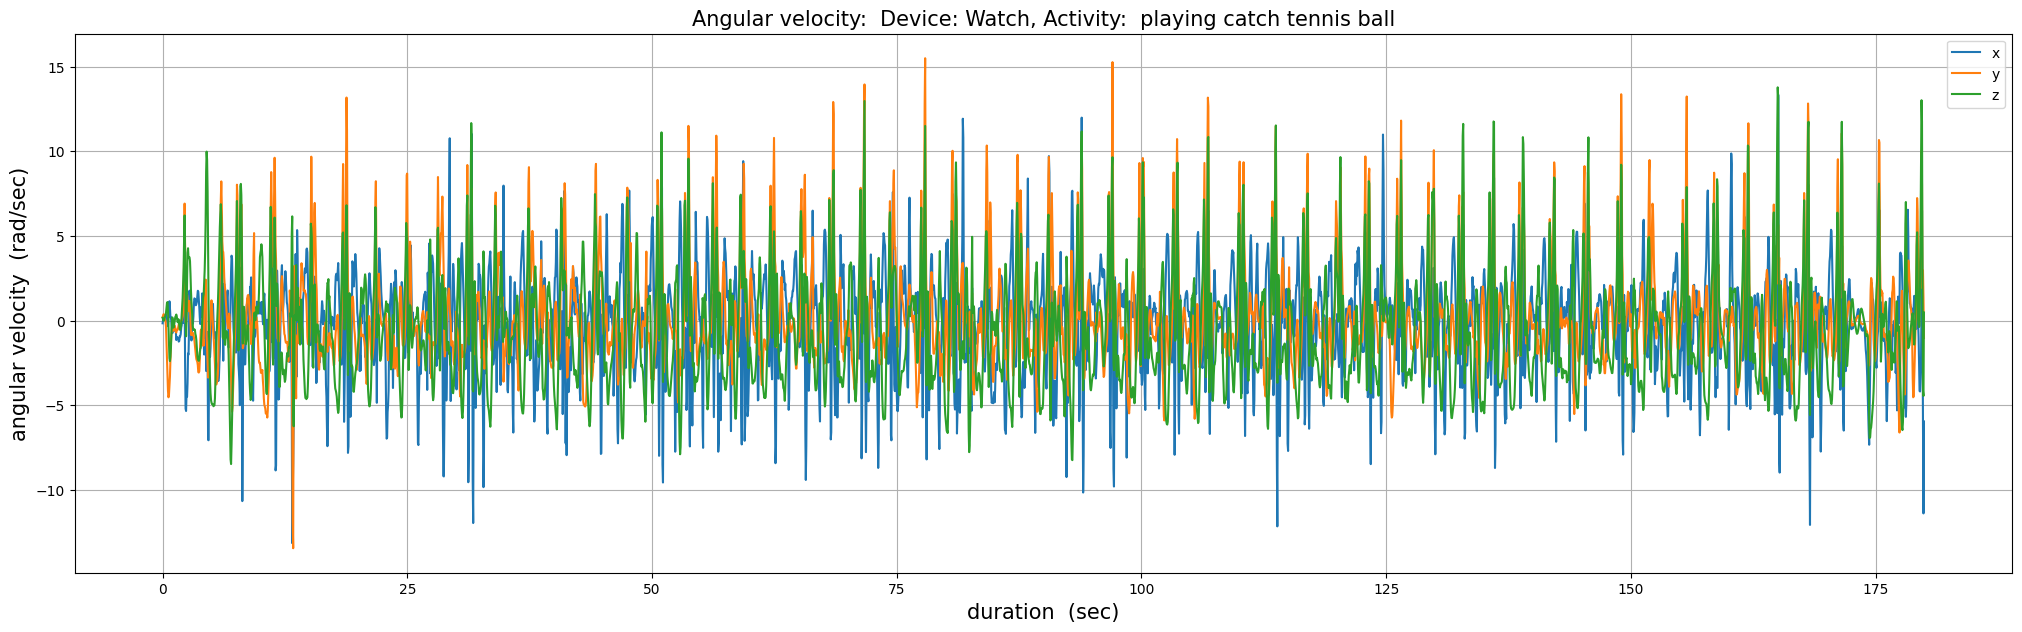

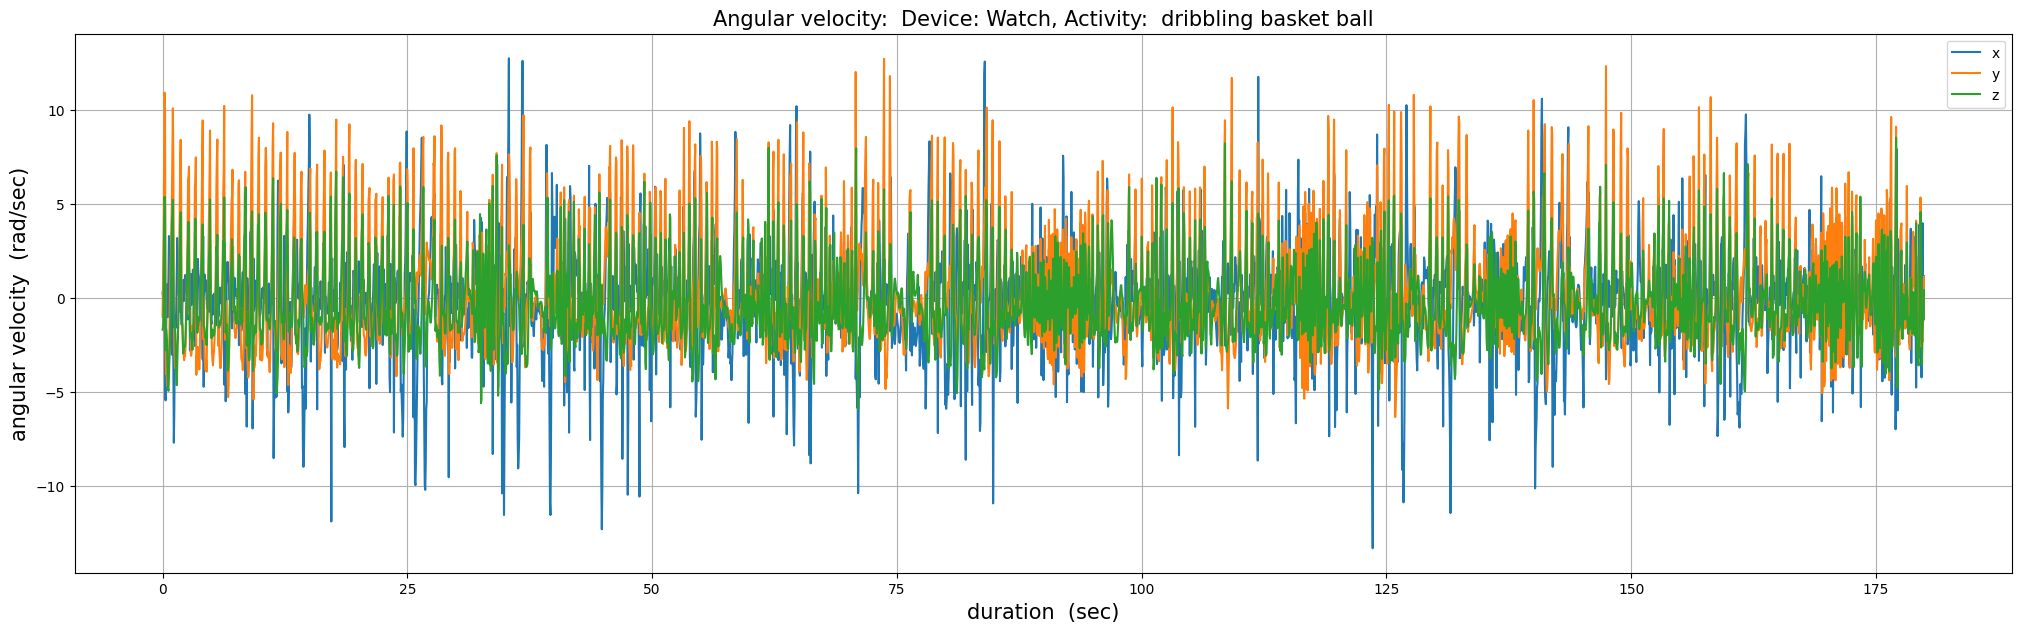

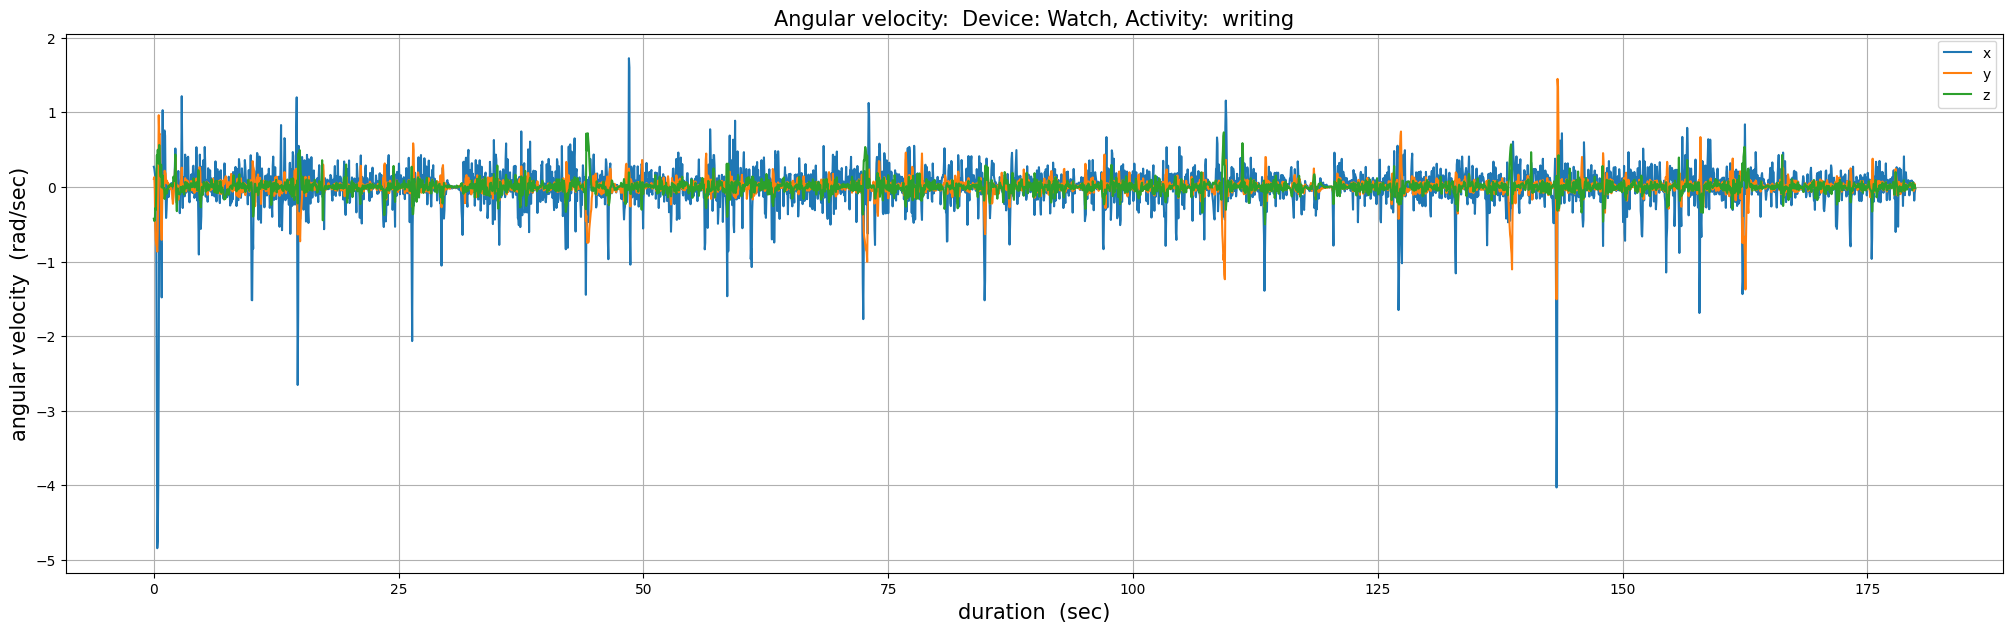

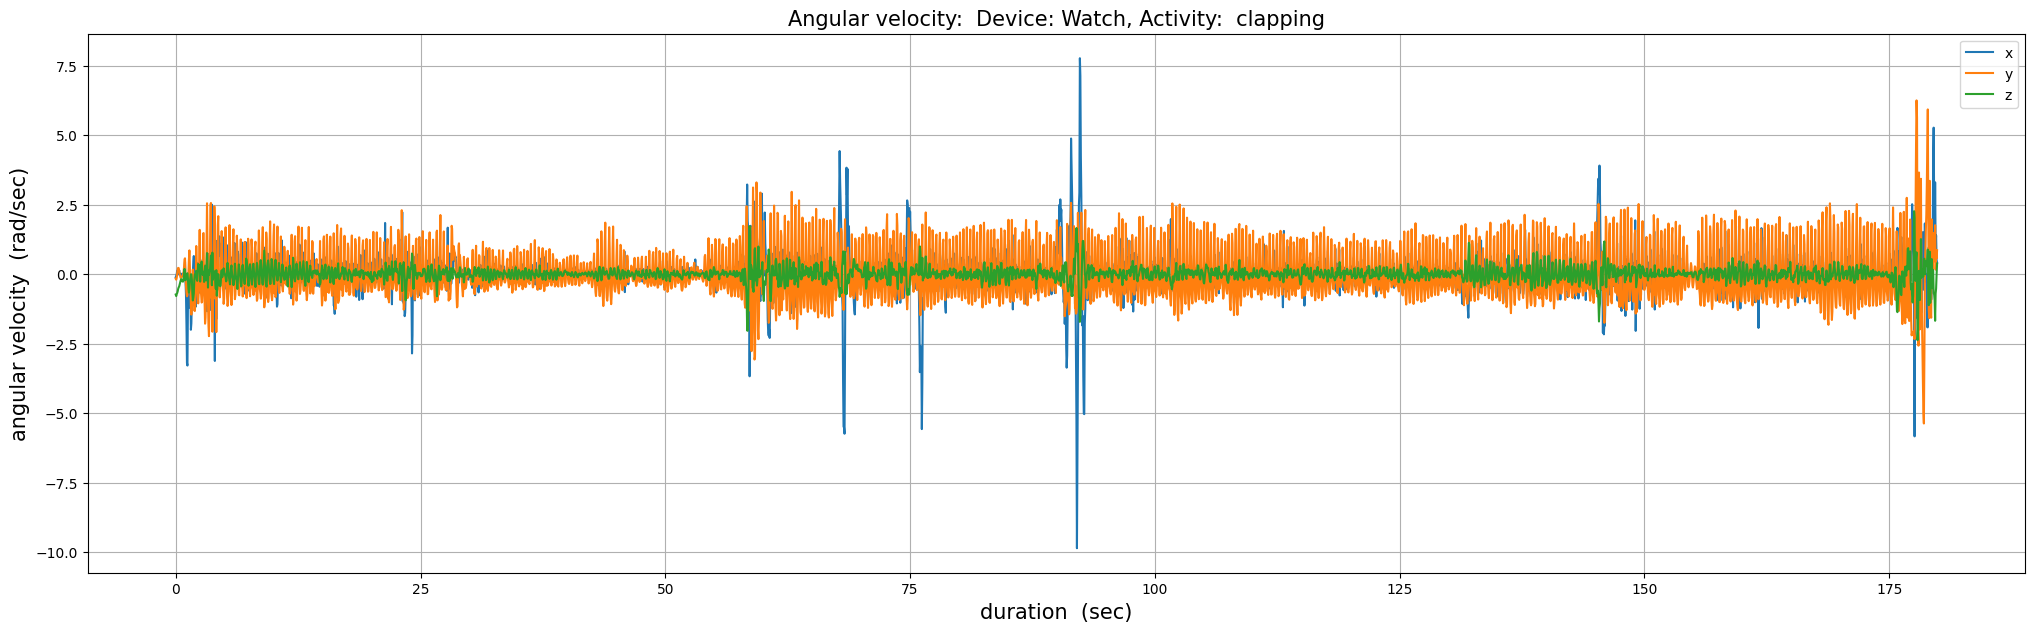

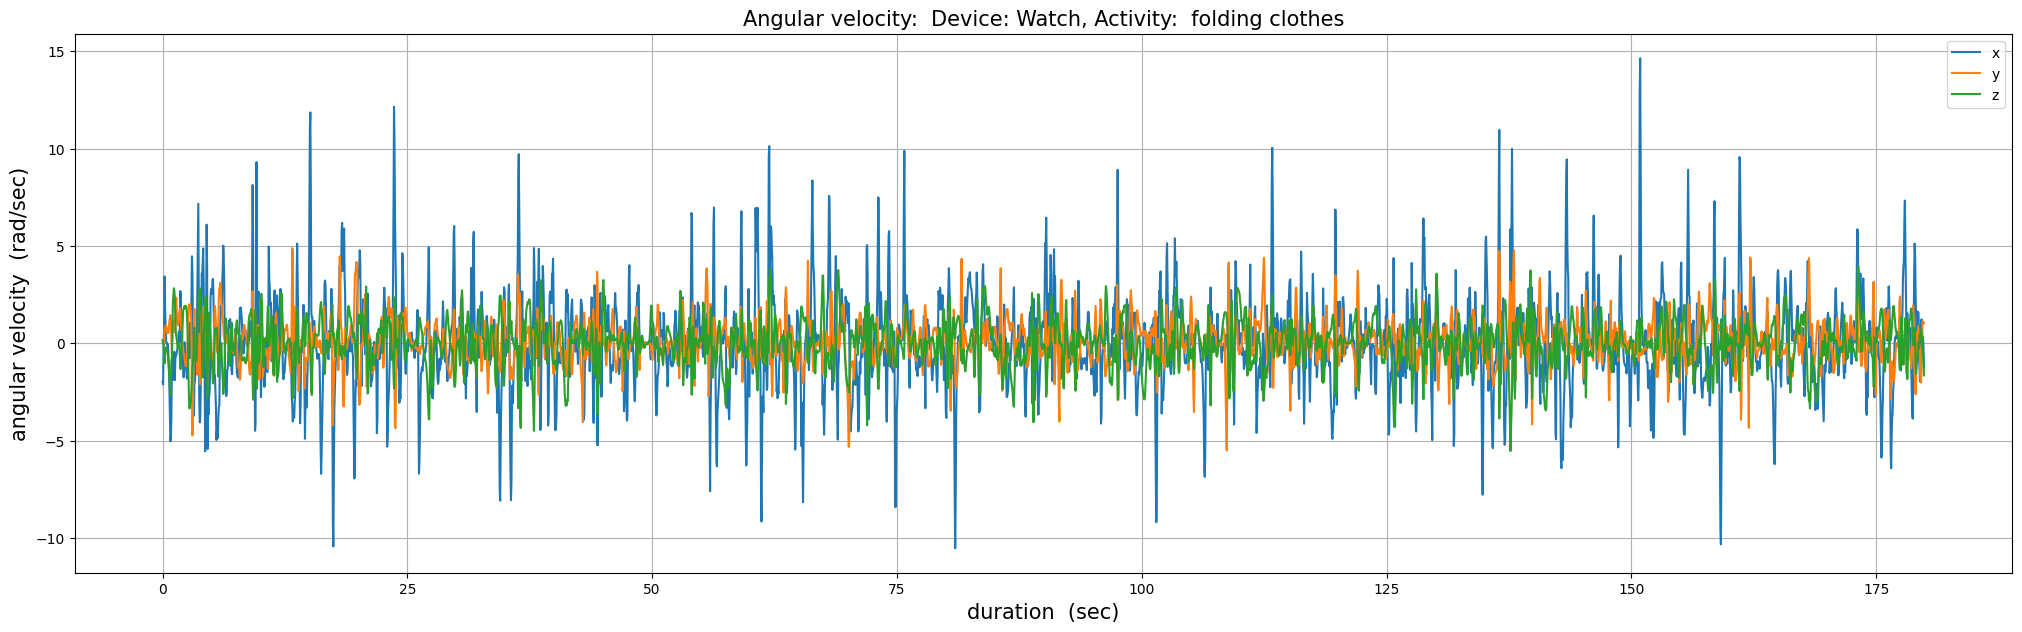

In [7]:
def show_ang_velocity_per_activity(df, act, interval_in_sec = None):
  df1 = df.loc[df.activity == act].copy()
  df1.reset_index(drop = True, inplace = True)

  df1['duration'] = (df1['timestamp'] - df1['timestamp'].iloc[0])/1000000000 # nanoseconds --> seconds

  if interval_in_sec == None:
    ax = df1[:].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)
  else:
    ax = df1[:interval_in_sec*20].plot(kind='line', x='duration', y=['x','y','z'], figsize=(25,7), grid = True) # ,title = act)

  ax.set_xlabel('duration  (sec)', fontsize = 15)
  ax.set_ylabel('angular velocity  (rad/sec)',fontsize = 15)
  ax.set_title('Angular velocity:  Device: Watch, Activity:  ' + act, fontsize = 15)

for key in activity_codes_mapping:
  show_ang_velocity_per_activity(df_wg_p01, activity_codes_mapping[key])